**Universidade Federal da Bahia <br>
Escola Politécnica <br>
Departamento de Engenharia Elétrica e de Computação <br>
Disciplina: Introdução ao Aprendizado de Máquina (ENGG67) <br>
Professor: Antônio C. L. Fernandes Jr. <br>
Alunos: Daniel do Nascimento Gomes e Eduardo Santana Souza**

**Avaliação 2**

In [ ]:
pip install ucimlrepo


In [ ]:
pip install pygwalker

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.0/399.0 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 65.6 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 56.5 MB/s eta 0:00:00
  Attempting uninstall: sqlglot
    Found existing installation: sqlglot 20.11.0
    Uninstalling sqlglot-20.11.0:
      Successfully uninstalled sqlglot-20.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

**1ª Questão: (7,0 pontos) Utilizando o banco de dados “Rice (Cammeo and Osmancik)” disponível em UC Irvine Machine Learning Repository:
https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik, faça o que se pede a seguir. <br>
a. Aborde o problema de classificação utilizando o algoritmo k-NN.**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
data_set_atributes = rice_cammeo_and_osmancik.data.features
data_set_target = rice_cammeo_and_osmancik.data.targets
data_set_original = rice_cammeo_and_osmancik.data.original



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix , ConfusionMatrixDisplay , precision_score , recall_score , classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold , cross_val_score
import pygwalker as pyg
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data_set_atributes

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231  525.578979         229.749878          85.093788      0.928882   
1     14656  494.311005         206.020065          91.730972      0.895405   
2     14634  501.122009         214.106781          87.768288      0.912118   
3     13176  458.342987         193.337387          87.448395      0.891861   
4     14688  507.166992         211.743378          89.312454      0.906691   
...     ...         ...                ...                ...           ...   
3805  11441  415.858002         170.486771          85.756592      0.864280   
3806  11625  421.390015         167.714798          89.462570      0.845850   
3807  12437  442.498993         183.572922          86.801979      0.881144   
3808   9882  392.296997         161.193985          78.210480      0.874406   
3809  11434  404.709992         161.079269          90.868195      0.825692   

      Convex_Area    Extent  
0           15617  0.572896  
1           15072  0.615436  
2           14954  0.693259  
3           13368  0.640669  
4           15262  0.646024  
...           ...       ...  
3805        11628  0.681012  
3806        11904  0.694279  
3807        12645  0.626739  
3808        10097  0.659064  
3809        11591  0.802949  

[3810 rows x 7 columns]

In [ ]:
data_set_target

Class
0       Cammeo
1       Cammeo
2       Cammeo
3       Cammeo
4       Cammeo
...        ...
3805  Osmancik
3806  Osmancik
3807  Osmancik
3808  Osmancik
3809  Osmancik

[3810 rows x 1 columns]

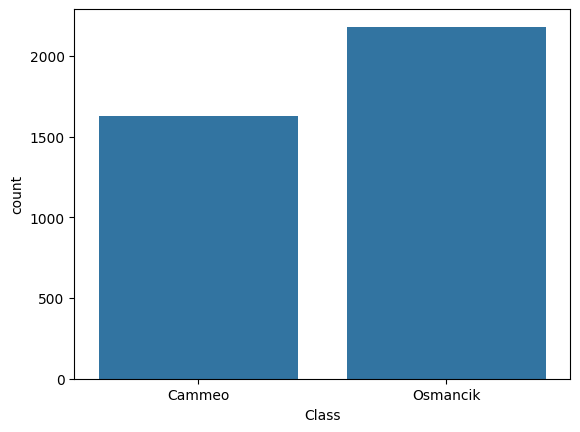

In [ ]:
sns.countplot(data = data_set_target, x = data_set_target.Class);

In [ ]:
data_set_target.value_counts()

Class   
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

Osmancik: 57,22%
Cammeo: 42,78%

In [ ]:
data_set_original

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231  525.578979         229.749878          85.093788      0.928882   
1     14656  494.311005         206.020065          91.730972      0.895405   
2     14634  501.122009         214.106781          87.768288      0.912118   
3     13176  458.342987         193.337387          87.448395      0.891861   
4     14688  507.166992         211.743378          89.312454      0.906691   
...     ...         ...                ...                ...           ...   
3805  11441  415.858002         170.486771          85.756592      0.864280   
3806  11625  421.390015         167.714798          89.462570      0.845850   
3807  12437  442.498993         183.572922          86.801979      0.881144   
3808   9882  392.296997         161.193985          78.210480      0.874406   
3809  11434  404.709992         161.079269          90.868195      0.825692   

      Convex_Area    Extent     Class  
0           15617  0.572896    Cammeo  
1           15072  0.615436    Cammeo  
2           14954  0.693259    Cammeo  
3           13368  0.640669    Cammeo  
4           15262  0.646024    Cammeo  
...           ...       ...       ...  
3805        11628  0.681012  Osmancik  
3806        11904  0.694279  Osmancik  
3807        12645  0.626739  Osmancik  
3808        10097  0.659064  Osmancik  
3809        11591  0.802949  Osmancik  

[3810 rows x 8 columns]

In [ ]:
data_set_original.describe()

Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count   3810.000000  3810.000000        3810.000000        3810.000000   
mean   12667.727559   454.239180         188.776222          86.313750   
std     1732.367706    35.597081          17.448679           5.729817   
min     7551.000000   359.100006         145.264465          59.532406   
25%    11370.500000   426.144752         174.353855          82.731695   
50%    12421.500000   448.852493         185.810059          86.434647   
75%    13950.000000   483.683746         203.550438          90.143677   
max    18913.000000   548.445984         239.010498         107.542450   

       Eccentricity   Convex_Area       Extent  
count   3810.000000   3810.000000  3810.000000  
mean       0.886871  12952.496850     0.661934  
std        0.020818   1776.972042     0.077239  
min        0.777233   7723.000000     0.497413  
25%        0.872402  11626.250000     0.598862  
50%        0.889050  12706.500000     0.645361  
75%        0.902588  14284.000000     0.726562  
max        0.948007  19099.000000     0.861050

In [ ]:
data_set_original.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [ ]:
data_set_original.shape

(3810, 8)

In [ ]:
data_set_original.duplicated().sum()

0

In [ ]:
#Funcao para plotar boxplot
def plotar_boxplot(dados):
  plt.figure(figsize=(8, 10))
  plt.subplot(2, 1, 2)
  sns.boxplot(data = dados , orient="v")
  plt.title(f'Boxplot({dados.name})')
  plt.tight_layout(pad=3.0)

In [ ]:
#Funcao para plotar histograma
def plotar_histograma(dados):
  plt.figure(figsize=(8, 10))
  plt.subplot(2, 1, 1)
  plt.title(f'Histograma({dados.name})')
  sns.histplot(data = dados, kde = True , bins=10);
  plt.subplot(2, 1, 2)
  plt.title(f'Histograma({dados.name})')
  sns.histplot(data=data_set_original, x=dados,  bins=10, hue='Class', palette='husl' , kde= True);

In [ ]:
def plot_custom_boxplot(data): # Função para plotar todos boxsplot dos atributos


    fig, ax = plt.subplots(figsize=(10, 6))

    sns.boxplot(data=data, orient="v", palette="Set2", width=0.5, ax=ax)


    plt.subplots_adjust(left=0, right=1.2, top=0.9, bottom=0.3)


    plt.show()

In [ ]:
def remocao_outliers(dataset, column):
    Q1 = np.percentile(dataset[column], 25)
    Q3 = np.percentile(dataset[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    clean_dataset = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]
    return clean_dataset

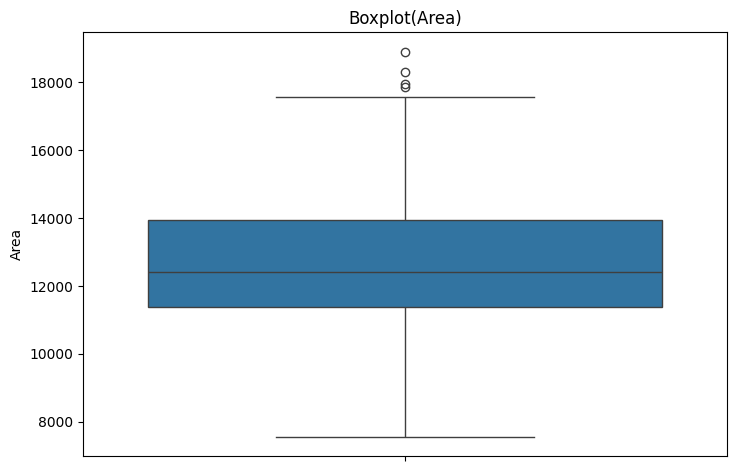

In [ ]:
plotar_boxplot(data_set_original.Area)

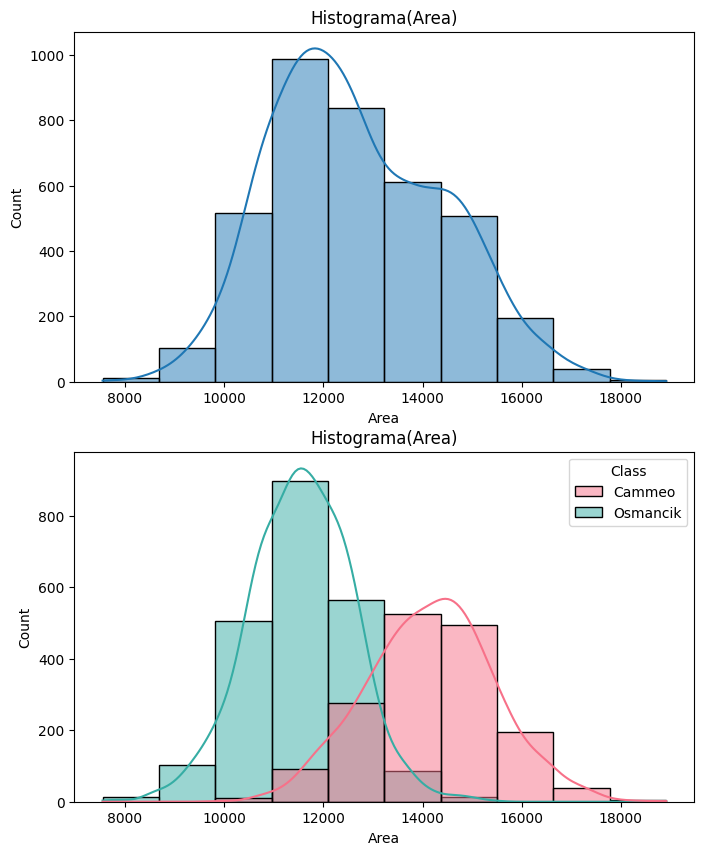

In [ ]:
plotar_histograma(data_set_original.Area)

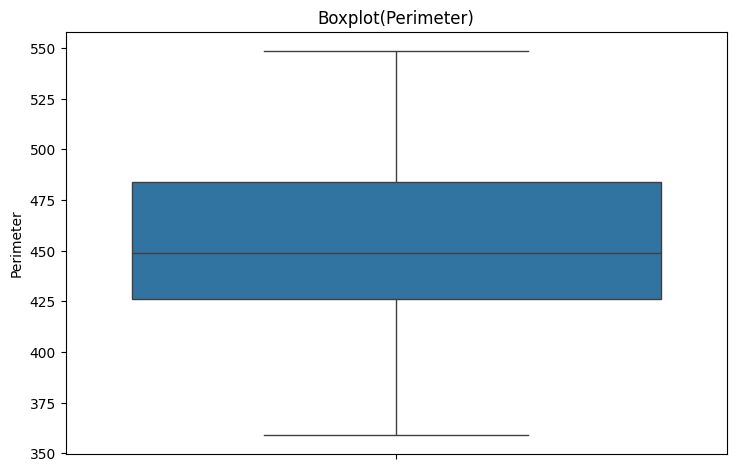

In [ ]:
plotar_boxplot(data_set_original.Perimeter)

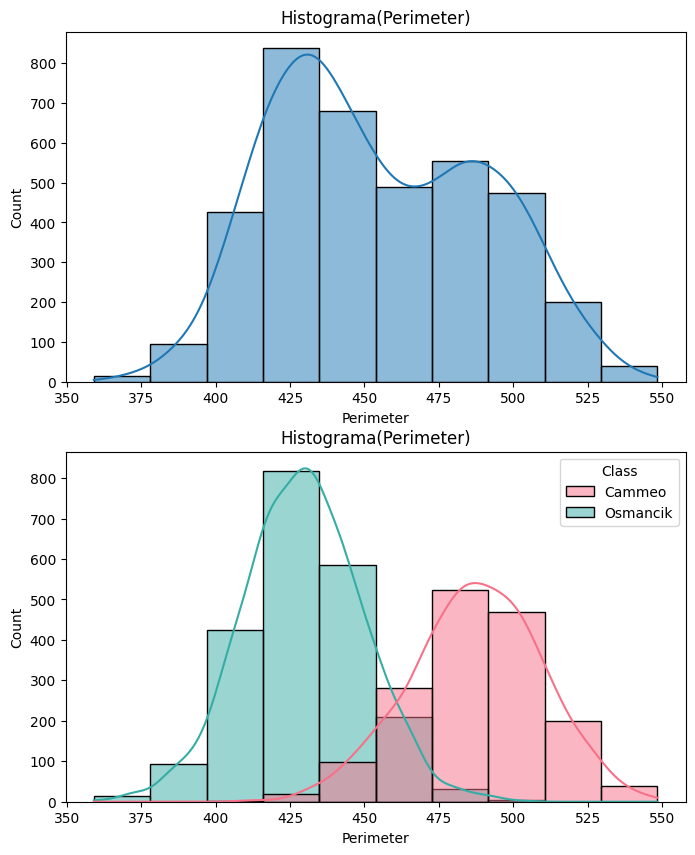

In [ ]:
plotar_histograma(data_set_original.Perimeter)

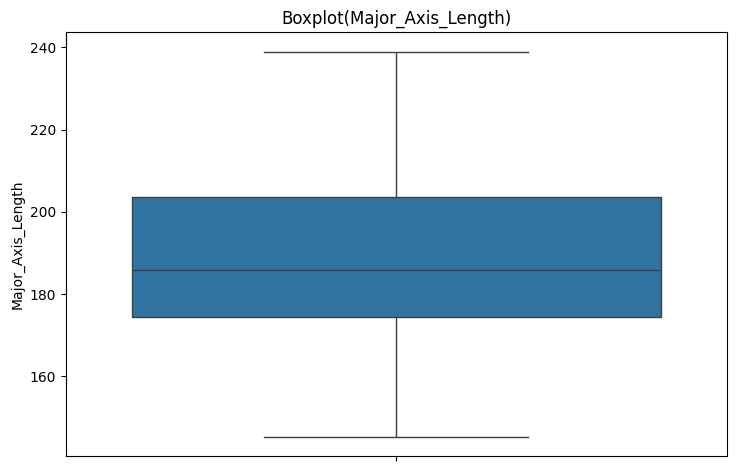

In [ ]:
plotar_boxplot(data_set_original.Major_Axis_Length 	)

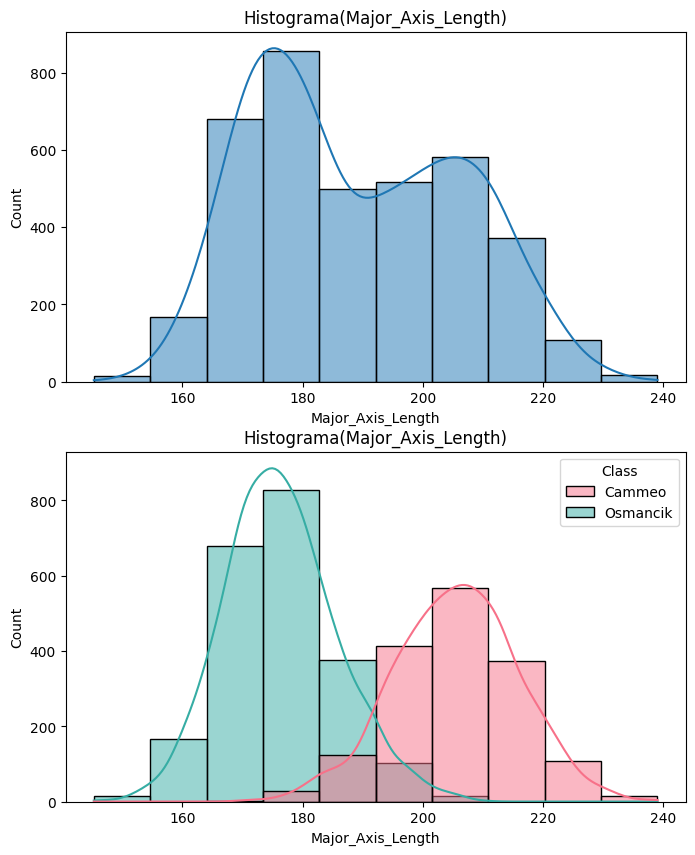

In [ ]:
plotar_histograma(data_set_original.Major_Axis_Length)

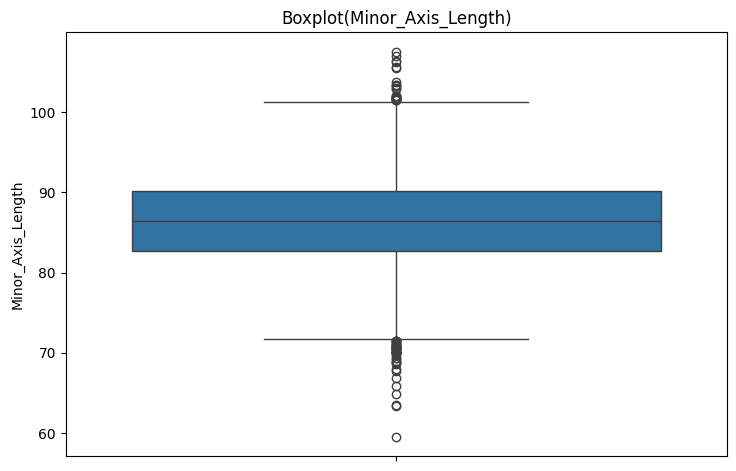

In [ ]:
plotar_boxplot(data_set_original.Minor_Axis_Length)

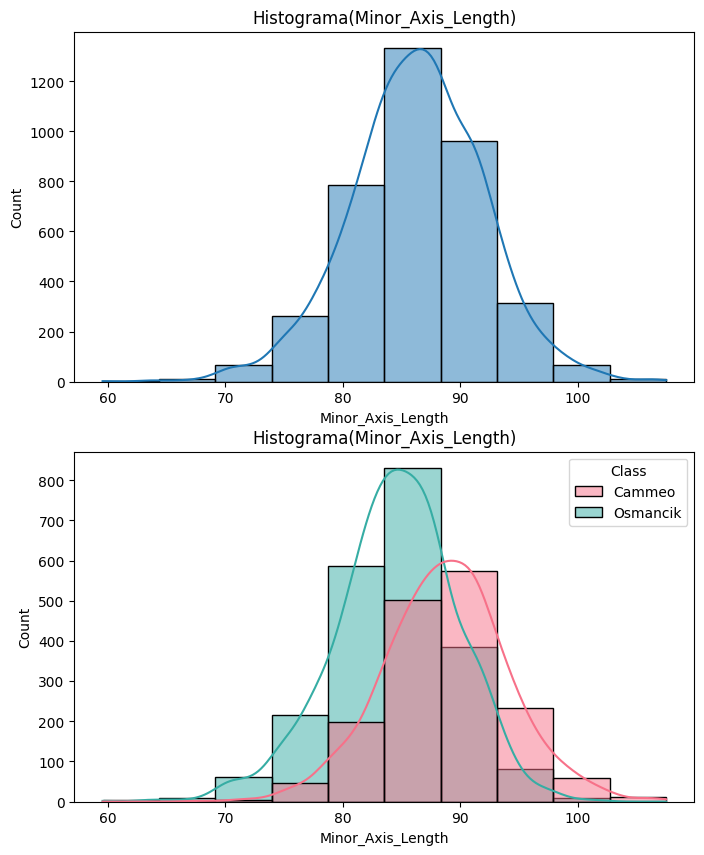

In [ ]:
plotar_histograma(data_set_original.Minor_Axis_Length)

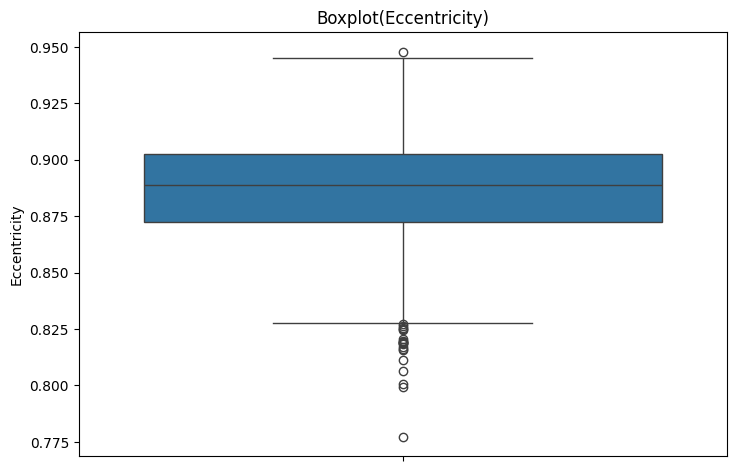

In [ ]:
plotar_boxplot(data_set_original.Eccentricity)

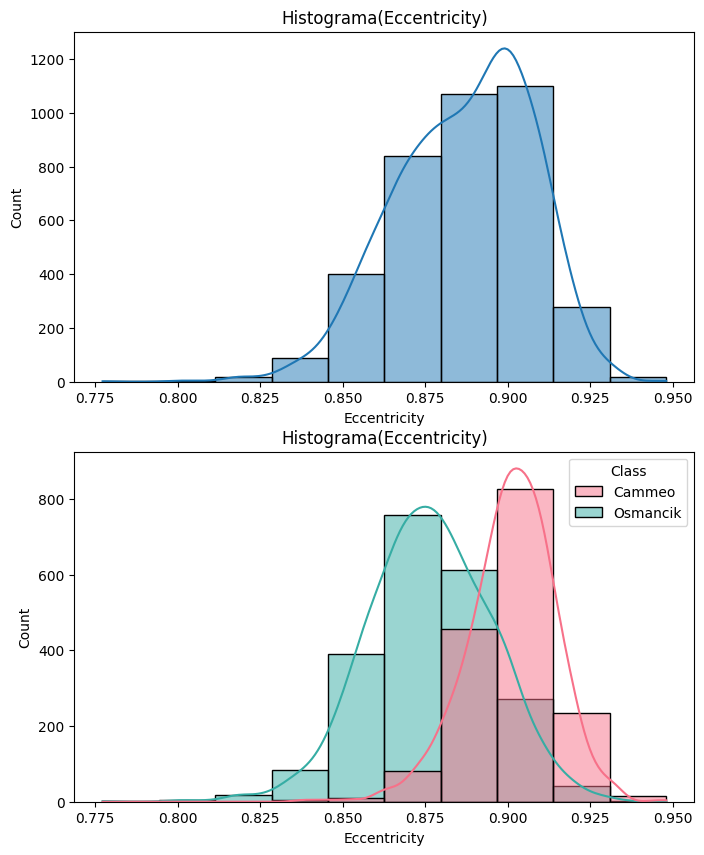

In [ ]:
plotar_histograma(data_set_original.Eccentricity)

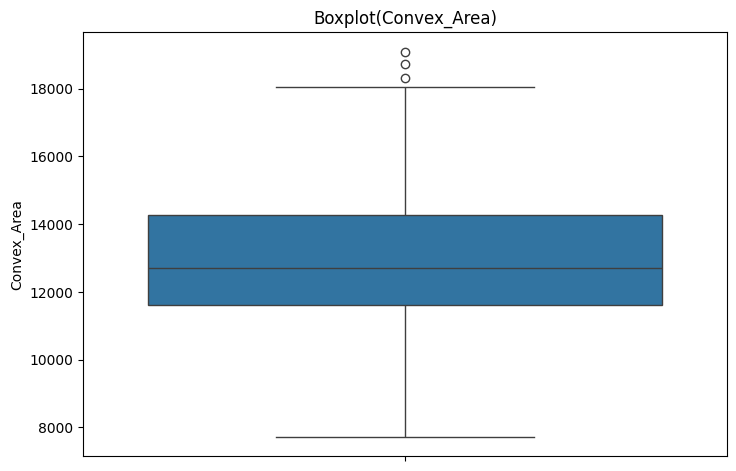

In [ ]:
plotar_boxplot(data_set_original.Convex_Area)

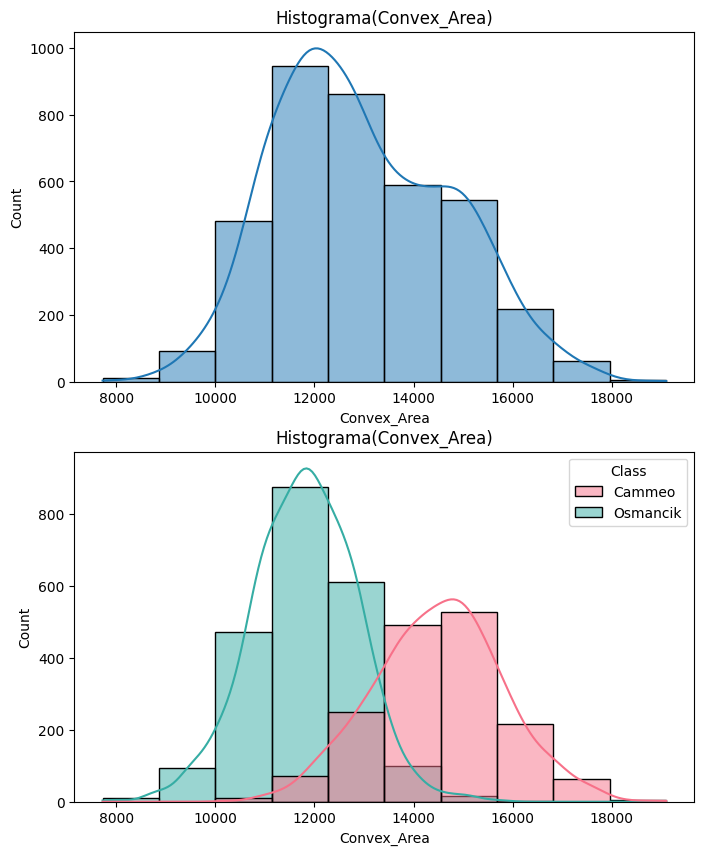

In [ ]:
plotar_histograma(data_set_original.Convex_Area)

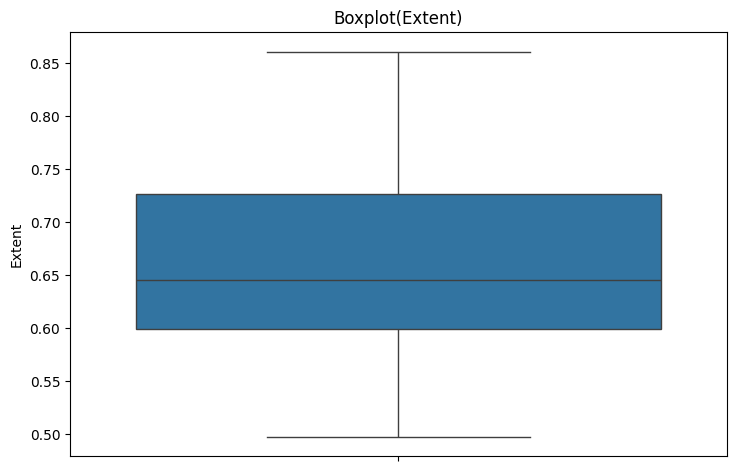

In [ ]:
plotar_boxplot(data_set_original.Extent)

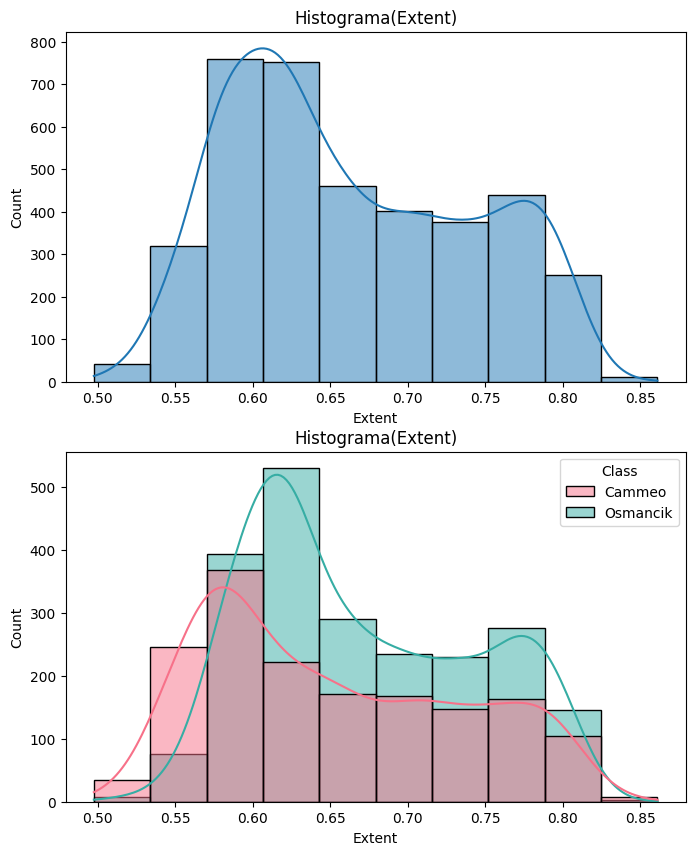

In [ ]:
plotar_histograma(data_set_original.Extent)

In [ ]:
x_treino,x_teste,y_treino, y_teste = train_test_split(data_set_atributes,data_set_target,test_size = 0.2 , random_state =0)

In [ ]:
folds = KFold (n_splits=10, shuffle= True , random_state= 5 )
k_range = range(1, 60)

k_scores = {}

for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    resultado = cross_val_score(modelo, x_treino, y_treino.values.ravel(), cv=folds)
    k_scores[k] = resultado.mean()

best_k = max(k_scores, key=k_scores.get)
best_score = k_scores[best_k]

print("Melhor valor de k:", best_k)
print("Melhor média de validação cruzada:", best_score)

Melhor valor de k: 14
Melhor média de validação cruzada: 0.8969790767903364


In [ ]:
folds = KFold (n_splits=10, shuffle= True , random_state= 5 )
k_range = range(1, 60)

k_scores = {}

for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    resultado = cross_val_score(modelo, x_treino, y_treino.values.ravel(), cv=folds)
    k_scores[k] = resultado.mean()

best_k = max(k_scores, key=k_scores.get)
best_score = k_scores[best_k]

print("Melhor valor de k:", best_k)
print("Melhor média de validação cruzada:", best_score)

Melhor valor de k: 55
Melhor média de validação cruzada: 0.8828710094909406


In [ ]:
folds = KFold (n_splits=10, shuffle= True , random_state= 5 )
k_range = range(1, 60)

k_scores = {}

for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=3)
    resultado = cross_val_score(modelo, x_treino, y_treino.values.ravel(), cv=folds)
    k_scores[k] = resultado.mean()

best_k = max(k_scores, key=k_scores.get)
best_score = k_scores[best_k]

print("Melhor valor de k:", best_k)
print("Melhor média de validação cruzada:", best_score)

Melhor valor de k: 53
Melhor média de validação cruzada: 0.8815595340811045


In [ ]:
knn = KNeighborsClassifier(n_neighbors= 14 , metric='minkowski', p=1)
knn.fit(x_treino, y_treino.values.ravel());
pred_knn = knn.predict(x_teste)


In [ ]:
accuracy_score(y_teste,pred_knn)

0.8976377952755905

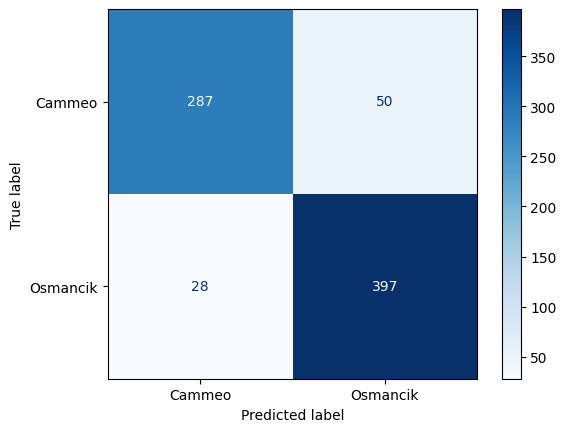

In [ ]:
cnmatrix1 =confusion_matrix(y_teste,pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cnmatrix1,display_labels=knn.classes_)

disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

In [ ]:
previsores_esc = StandardScaler().fit_transform(data_set_atributes)

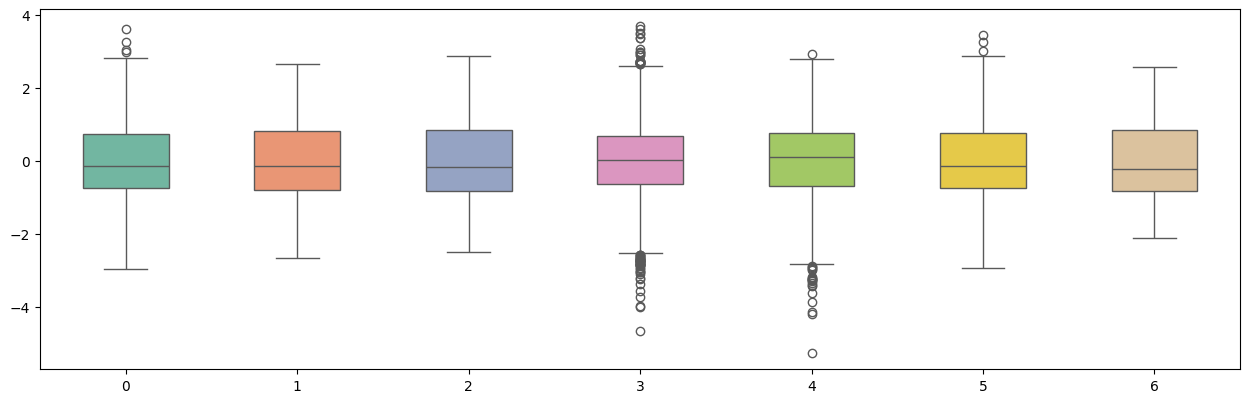

In [ ]:
plot_custom_boxplot(previsores_esc)

In [ ]:
data_set_previsores_esc = pd.DataFrame(previsores_esc, columns=data_set_atributes.columns)


In [ ]:
data_set_previsores_esc.describe()

Area     Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count  3810.000000  3.810000e+03       3.810000e+03       3.810000e+03   
mean      0.000000  4.774250e-16       2.327447e-15      -2.387125e-16   
std       1.000131  1.000131e+00       1.000131e+00       1.000131e+00   
min      -2.953991 -2.673019e+00      -2.494027e+00      -4.674645e+00   
25%      -0.748916 -7.893376e-01      -8.266678e-01      -6.252425e-01   
50%      -0.142152 -1.513437e-01      -1.700159e-01       2.110226e-02   
75%       0.740282  8.272709e-01       8.468352e-01       6.685081e-01   
max       3.605523  2.646823e+00       2.879351e+00       3.705439e+00   

       Eccentricity   Convex_Area        Extent  
count  3.810000e+03  3.810000e+03  3.810000e+03  
mean  -2.088735e-15 -4.774250e-16 -1.186103e-15  
std    1.000131e+00  1.000131e+00  1.000131e+00  
min   -5.267280e+00 -2.943312e+00 -2.130313e+00  
25%   -6.951263e-01 -7.464501e-01 -8.166890e-01  
50%    1.047129e-01 -1.384541e-01 -2.145916e-01  
75%    7.551068e-01  7.494085e-01  8.368337e-01  
max    2.937147e+00  3.459430e+00  2.578260e+00

In [ ]:
data_set_original_esc = pd.concat([data_set_previsores_esc, data_set_target], axis=1)

In [ ]:
gwalker = pyg.walk(data_set_original_esc) # Ferramenta pyg para visualizar o datase de forma dinamica

Box(children=(HTML(value='\n<div id="ifr-pyg-00061f7045d883e2KQ0oWDBycvxaYe89" style="height: auto">\n    <hea…

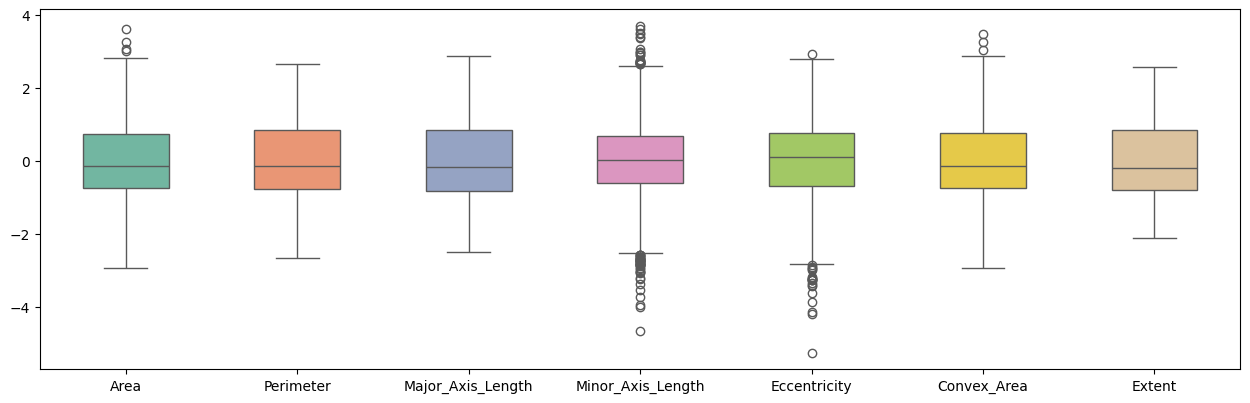

In [ ]:
plot_custom_boxplot(data_set_original_esc)

In [ ]:
data_set_original_esc_sem_outliers = remocao_outliers(data_set_original_esc, 'Minor_Axis_Length' )
data_set_original_esc_sem_outliers = remocao_outliers(data_set_original_esc_sem_outliers, 'Eccentricity' )

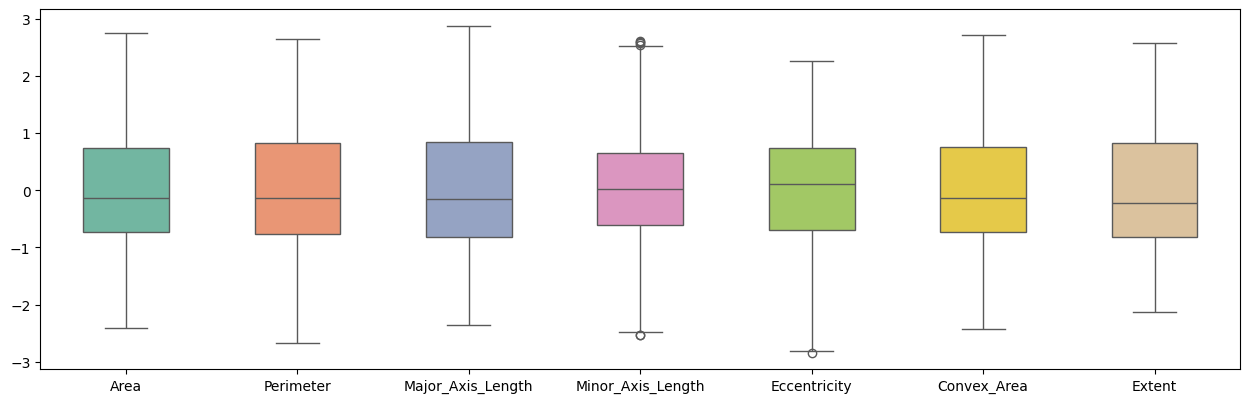

In [ ]:
plot_custom_boxplot(data_set_original_esc_sem_outliers)

In [ ]:
data_set_original_esc_sem_outliers_2 = remocao_outliers(data_set_original_esc_sem_outliers, 'Minor_Axis_Length' )

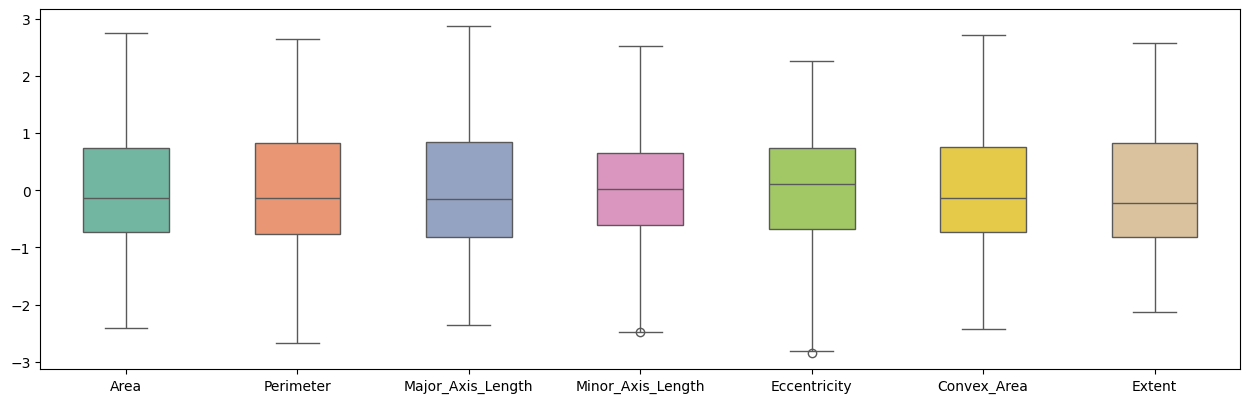

In [ ]:
plot_custom_boxplot(data_set_original_esc_sem_outliers_2)

In [ ]:
data_set_original_esc_sem_outliers_2.shape

(3719, 8)

saiu  de 3810 amostras para 3719

In [ ]:
data_set_original_esc_sem_outliers_2.describe()

Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count  3719.000000  3719.000000        3719.000000        3719.000000   
mean      0.008479     0.010499           0.009497           0.007751   
std       0.966332     0.981990           0.990472           0.919627   
min      -2.403228    -2.673019          -2.348757          -2.481075   
25%      -0.733328    -0.768147          -0.813833          -0.602970   
50%      -0.133204    -0.137590          -0.159779           0.020768   
75%       0.734798     0.826505           0.847592           0.648436   
max       2.756285     2.646823           2.879351           2.520460   

       Eccentricity  Convex_Area       Extent  
count   3719.000000  3719.000000  3719.000000  
mean       0.007522     0.008718    -0.006018  
std        0.961124     0.966796     0.996005  
min       -2.842830    -2.421007    -2.121735  
25%       -0.687315    -0.726892    -0.818308  
50%        0.106364    -0.129730    -0.226358  
75%        0.743663     0.746313     0.826750  
max        2.264517     2.704676     2.578260

In [ ]:
data_set_original_esc_sem_outliers_2.Class.value_counts()

Class
Osmancik    2119
Cammeo      1600
Name: count, dtype: int64

Osmancik: 56,98%
Cammeo: 43,02%

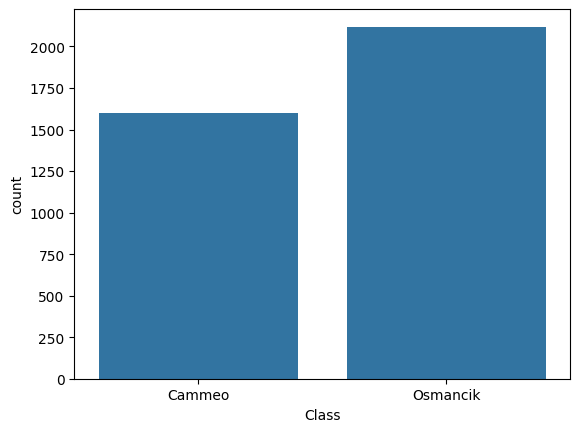

In [ ]:
sns.countplot(data = data_set_original_esc_sem_outliers_2, x = 'Class');

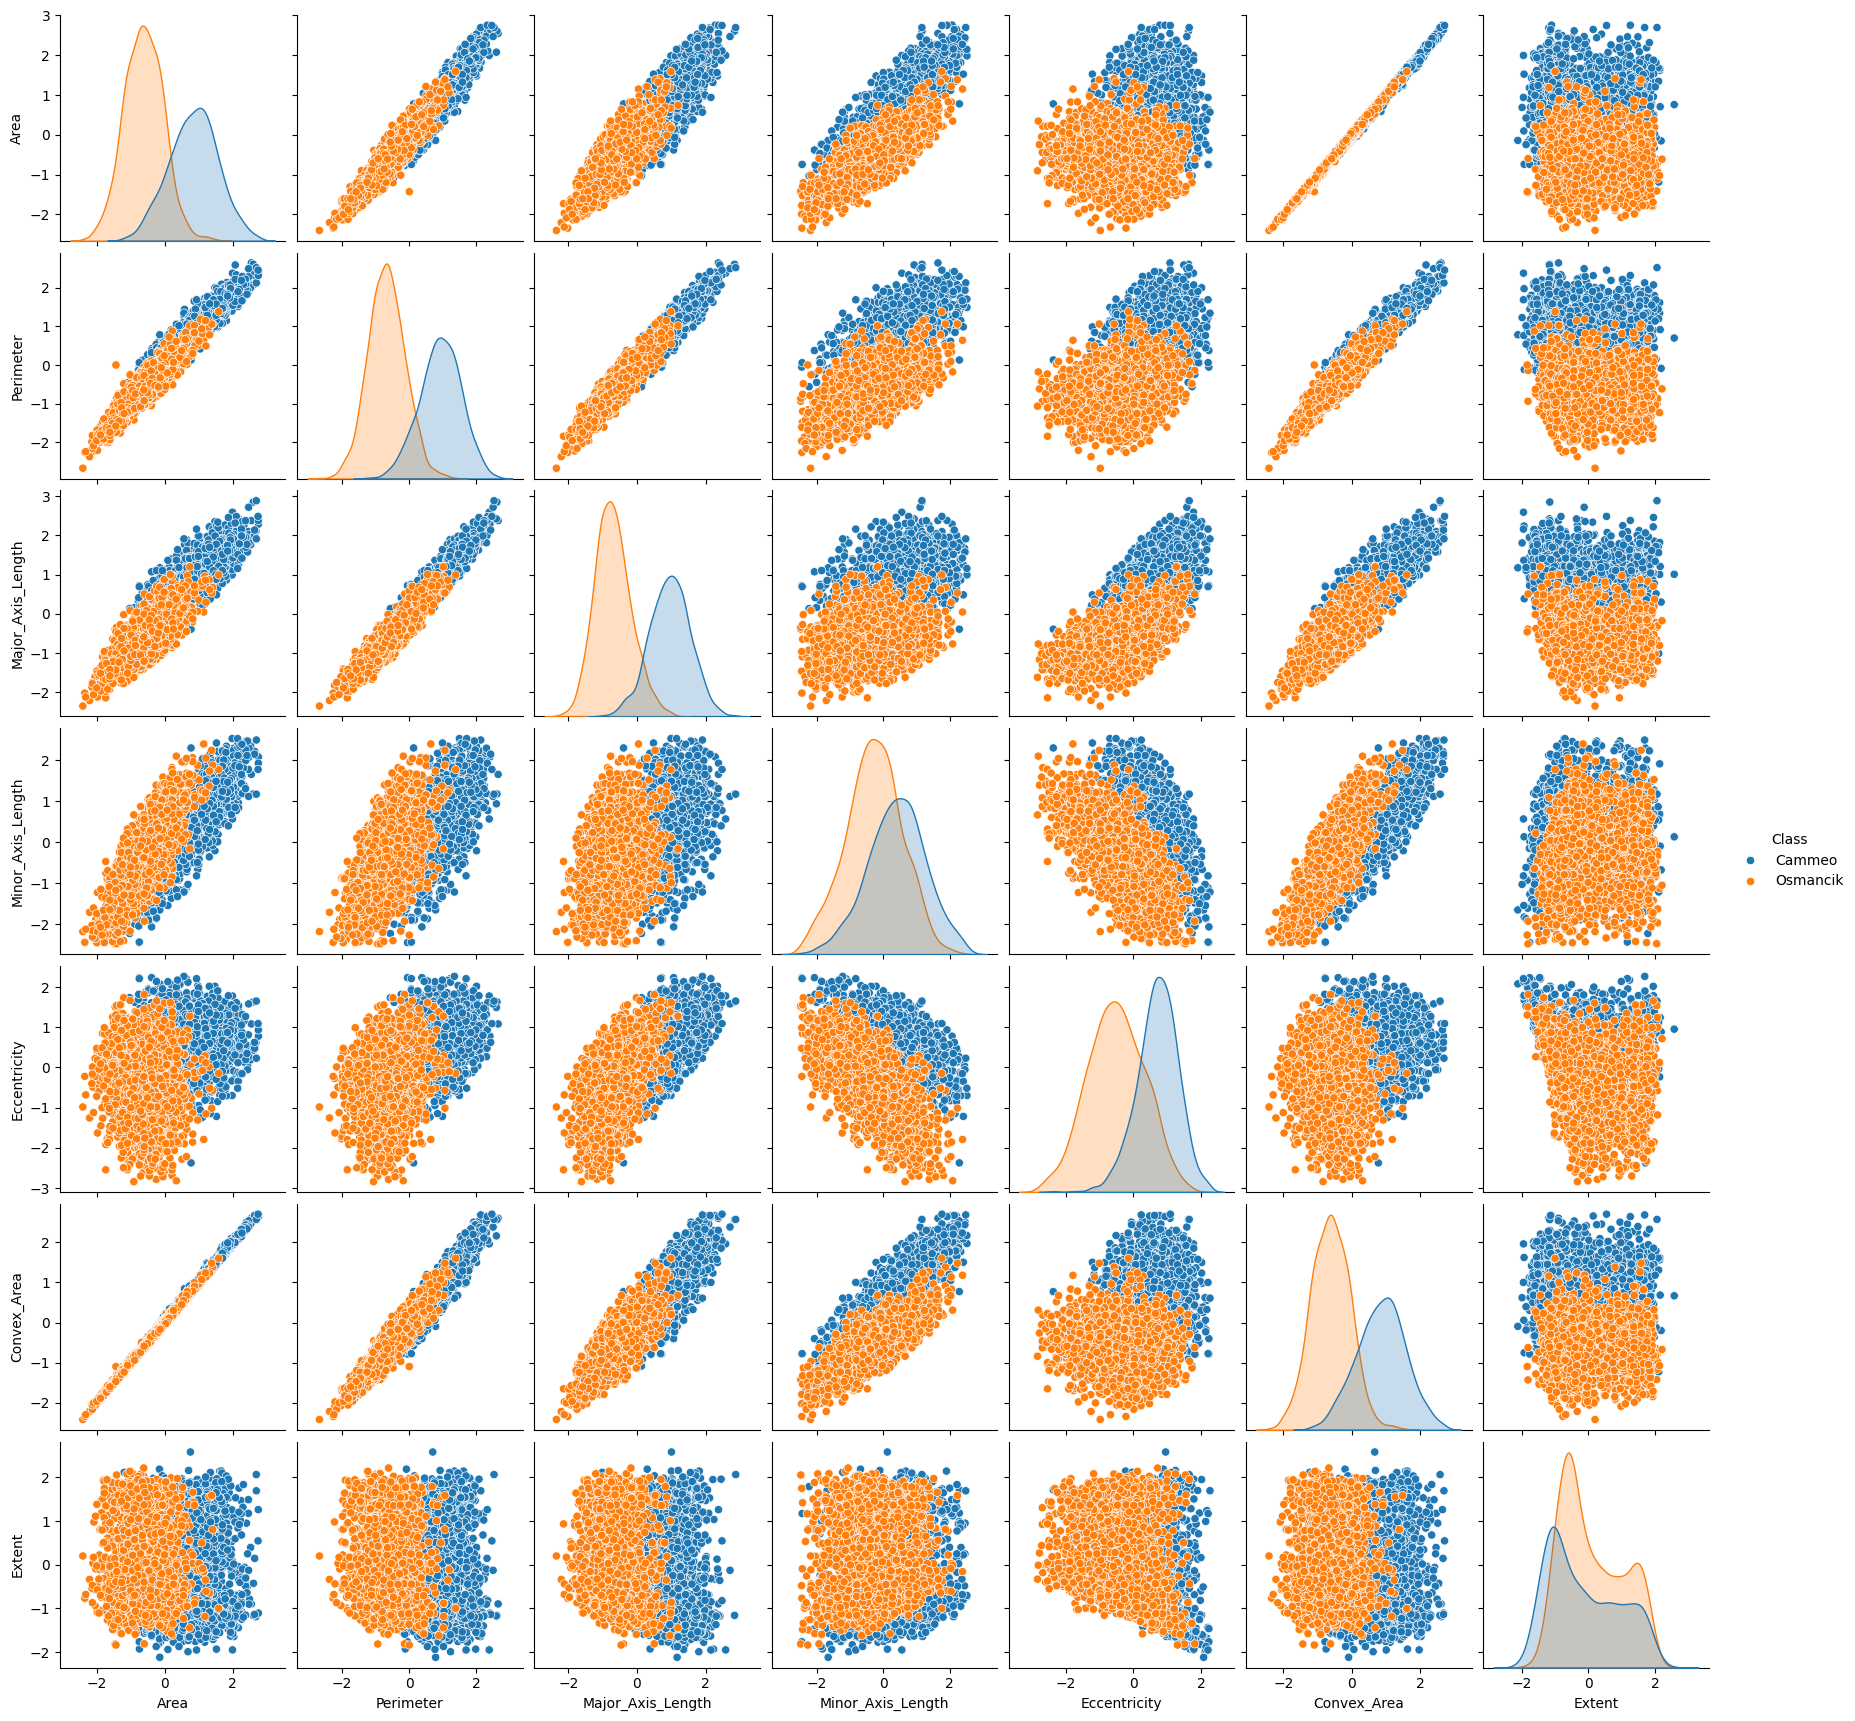

In [ ]:
sns.pairplot(data_set_original_esc_sem_outliers_2, hue='Class')  # 'Class' é a coluna de saída
plt.show()

In [ ]:
previsores_esc2 = data_set_original_esc_sem_outliers_2.iloc[:,0:7]
alvo_esc2 = data_set_original_esc_sem_outliers_2.iloc[:,7]

In [ ]:
x_treino2,x_teste2,y_treino2, y_teste2 = train_test_split(previsores_esc2,alvo_esc2,test_size = 0.3 , random_state =0)


In [ ]:
folds = KFold (n_splits=10, shuffle= True , random_state= 5 )
k_range = range(1, 60)

k_scores = {}

for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    resultado = cross_val_score(modelo, x_treino2, y_treino2, cv=folds)
    k_scores[k] = resultado.mean()

best_k = max(k_scores, key=k_scores.get)
best_score = k_scores[best_k]

print("Melhor valor de k:", best_k)
print("Melhor média de validação cruzada:", best_score)

Melhor valor de k: 36
Melhor média de validação cruzada: 0.9304538756262893


In [ ]:
folds = KFold (n_splits=10, shuffle= True , random_state= 5 )
k_range = range(1, 60)

k_scores = {}

for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    resultado = cross_val_score(modelo, x_treino2, y_treino2, cv=folds)
    k_scores[k] = resultado.mean()

best_k = max(k_scores, key=k_scores.get)
best_score = k_scores[best_k]

print("Melhor valor de k:", best_k)
print("Melhor média de validação cruzada:", best_score)

Melhor valor de k: 47
Melhor média de validação cruzada: 0.9308355437665782


In [ ]:
folds = KFold (n_splits=10, shuffle= True , random_state= 5 )
k_range = range(1, 60)

k_scores = {}

for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=3)
    resultado = cross_val_score(modelo, x_treino2, y_treino2, cv=folds)
    k_scores[k] = resultado.mean()

best_k = max(k_scores, key=k_scores.get)
best_score = k_scores[best_k]

print("Melhor valor de k:", best_k)
print("Melhor média de validação cruzada:", best_score)

Melhor valor de k: 59
Melhor média de validação cruzada: 0.9312186855290303


In [ ]:
knn2 = KNeighborsClassifier(n_neighbors= 59 , metric='minkowski', p=3)
knn2.fit(x_treino2, y_treino2);
pred_knn2 = knn2.predict(x_teste2)

In [ ]:
accuracy_score(y_teste2,pred_knn2)

0.9202508960573477

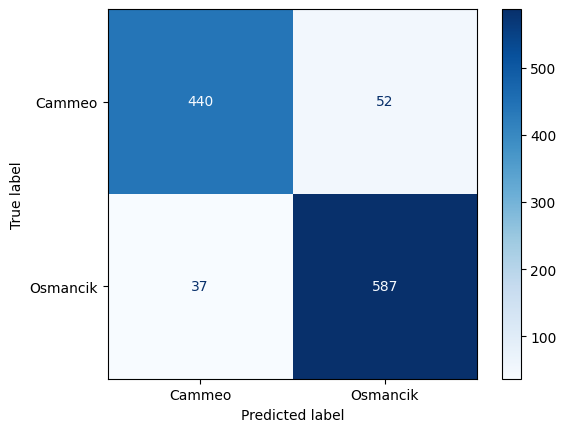

In [ ]:
cnmatrix2 =confusion_matrix(y_teste2,pred_knn2, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cnmatrix2,display_labels=knn2.classes_)

disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_treino2, y_treino2);
clf.feature_importances_

array([0.04114837, 0.08649073, 0.73529134, 0.02200004, 0.04356058,
       0.02421724, 0.04729171])

In [ ]:
x_treino2.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent'],
      dtype='object')

Area =  0.03469118 <br>
Perimeter = 0.08790935 <br>
Major_Axis_Length = 0.73968794 <br>
Minor_Axis_Length = 0.02271207 <br>
Eccentricity = 0.03798813 <br>
Convex_Area = 0.03377517 <br>
Extent = 0.04323617 <br>


In [ ]:
data_set_original_esc_sem_outliers_3 = data_set_original_esc_sem_outliers_2.drop(columns=['Minor_Axis_Length', 'Area' ,'Convex_Area','Eccentricity' ])

In [ ]:
previsores_esc3 = data_set_original_esc_sem_outliers_3.iloc[:,0:3]
alvo_esc3 = data_set_original_esc_sem_outliers_3.iloc[:,3]

In [ ]:
x_treino3,x_teste3,y_treino3, y_teste3 = train_test_split(previsores_esc3,alvo_esc3,test_size = 0.3 , random_state =0)

In [ ]:
folds = KFold (n_splits=10, shuffle= True , random_state= 5 )
k_range = range(1, 60)

k_scores = {}

for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    resultado = cross_val_score(modelo, x_treino3, y_treino3, cv=folds)
    k_scores[k] = resultado.mean()

best_k = max(k_scores, key=k_scores.get)
best_score = k_scores[best_k]

print("Melhor valor de k:", best_k)
print("Melhor média de validação cruzada:", best_score)

Melhor valor de k: 55
Melhor média de validação cruzada: 0.9262245800176834


In [ ]:
folds = KFold (n_splits=10, shuffle= True , random_state= 5 )
k_range = range(1, 60)

k_scores = {}

for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    resultado = cross_val_score(modelo, x_treino3, y_treino3, cv=folds)
    k_scores[k] = resultado.mean()

best_k = max(k_scores, key=k_scores.get)
best_score = k_scores[best_k]

print("Melhor valor de k:", best_k)
print("Melhor média de validação cruzada:", best_score)

Melhor valor de k: 58
Melhor média de validação cruzada: 0.9262245800176835


In [ ]:
folds = KFold (n_splits=10, shuffle= True , random_state= 5 )
k_range = range(1, 60)

k_scores = {}

for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    resultado = cross_val_score(modelo, x_treino3, y_treino3, cv=folds)
    k_scores[k] = resultado.mean()

best_k = max(k_scores, key=k_scores.get)
best_score = k_scores[best_k]

print("Melhor valor de k:", best_k)
print("Melhor média de validação cruzada:", best_score)

Melhor valor de k: 58
Melhor média de validação cruzada: 0.9262245800176835


In [ ]:
data_set_original_esc_sem_outliers_4 = data_set_original_esc_sem_outliers_2.drop(columns=['Minor_Axis_Length', 'Area', 'Convex_Area', 'Eccentricity', 'Perimeter'])

In [ ]:
previsores_esc4 = data_set_original_esc_sem_outliers_4.iloc[:,0:2]
alvo_esc4 = data_set_original_esc_sem_outliers_4.iloc[:,2]

In [ ]:
x_treino4,x_teste4,y_treino4, y_teste4 = train_test_split(previsores_esc3,alvo_esc4,test_size = 0.3 , random_state =0)

In [ ]:
folds = KFold (n_splits=10, shuffle= True , random_state= 5 )
k_range = range(1, 60)

k_scores = {}

for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    resultado = cross_val_score(modelo, x_treino4, y_treino4, cv=folds)
    k_scores[k] = resultado.mean()

best_k = max(k_scores, key=k_scores.get)
best_score = k_scores[best_k]

print("Melhor valor de k:", best_k)
print("Melhor média de validação cruzada:", best_score)

Melhor valor de k: 55
Melhor média de validação cruzada: 0.9262245800176834


In [ ]:
folds = KFold (n_splits=10, shuffle= True , random_state= 5 )
k_range = range(1, 60)

k_scores = {}

for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    resultado = cross_val_score(modelo, x_treino4, y_treino4, cv=folds)
    k_scores[k] = resultado.mean()

best_k = max(k_scores, key=k_scores.get)
best_score = k_scores[best_k]

print("Melhor valor de k:", best_k)
print("Melhor média de validação cruzada:", best_score)

Melhor valor de k: 58
Melhor média de validação cruzada: 0.9262245800176835


In [ ]:
folds = KFold (n_splits=10, shuffle= True , random_state= 5 )
k_range = range(1, 60)

k_scores = {}

for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=3)
    resultado = cross_val_score(modelo, x_treino4, y_treino4, cv=folds)
    k_scores[k] = resultado.mean()

best_k = max(k_scores, key=k_scores.get)
best_score = k_scores[best_k]

print("Melhor valor de k:", best_k)
print("Melhor média de validação cruzada:", best_score)

Melhor valor de k: 58
Melhor média de validação cruzada: 0.9269908635425876


In [ ]:
knn3 = KNeighborsClassifier(n_neighbors= 58 , metric='minkowski', p=3)
knn3.fit(x_treino4, y_treino4);
pred_knn3 = knn3.predict(x_teste4)

In [ ]:
accuracy_score(y_teste4,pred_knn3)

0.9166666666666666

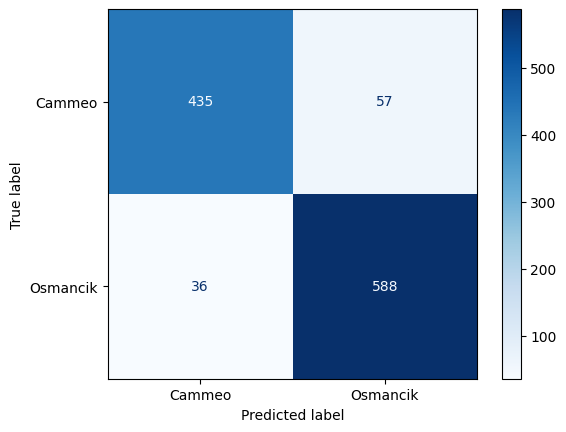

In [ ]:
cnmatrix2 =confusion_matrix(y_teste4,pred_knn3, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cnmatrix2,display_labels=knn2.classes_)
tn, fp, fn, tp = confusion_matrix(y_teste4,pred_knn3, labels=knn.classes_).ravel()
disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

O modelo teve um ACC menor mas a redução de atributos ajuda no custo computacional e a diferença foi apenas de 0,05

METRICAS

In [ ]:
print('Precisão para Cammeo: {:.2f}'.format(precision_score(y_teste4, pred_knn3, labels=knn.classes_, pos_label='Cammeo') ))
print('Precisão para Osmancik: {:.2f}'.format(precision_score(y_teste4, pred_knn3, labels=knn.classes_, pos_label='Osmancik')))
print('Sensibilidade para Cammeo: {:.2f}'.format(recall_score(y_teste4, pred_knn3, labels=knn.classes_, pos_label='Cammeo')))
print('Sensibilidade para Osmancik: {:.2f}'.format(recall_score(y_teste4, pred_knn3, labels=knn.classes_, pos_label='Osmancik')))
#print('Especificidade para Cammeo: {:.2f}'.format(tn / (tn+fp)))
#print('Epecificidade para Osmancik: {:.2f}'.format(tp / (tp + fn)))

Precisão para Cammeo: 0.92
Precisão para Osmancik: 0.91
Sensibilidade para Cammeo: 0.88
Sensibilidade para Osmancik: 0.94


In [ ]:
from imblearn.metrics import specificity_score
print('Especificidade para Cammeo: {:.2f}'.format(specificity_score(y_teste4, pred_knn3, labels=knn.classes_, pos_label='Cammeo')))
print('Epecificidade para Osmancik: {:.2f}'.format(specificity_score(y_teste4, pred_knn3, labels=knn.classes_, pos_label='Osmancik')))

Especificidade para Cammeo: 0.94
Epecificidade para Osmancik: 0.88


In [ ]:
print (classification_report(y_teste4,pred_knn3))

              precision    recall  f1-score   support

      Cammeo       0.92      0.88      0.90       492
    Osmancik       0.91      0.94      0.93       624

    accuracy                           0.92      1116
   macro avg       0.92      0.91      0.92      1116
weighted avg       0.92      0.92      0.92      1116



In [ ]:
gwalker = pyg.walk(data_set_original_esc_sem_outliers_4)

Box(children=(HTML(value='\n<div id="ifr-pyg-00061f7051a20b9a8vTsiIYC1L3b2jqk" style="height: auto">\n    <hea…

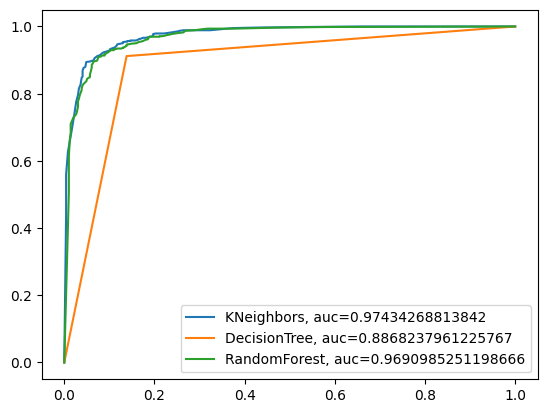

In [ ]:
#curva ROC e valor de AUC para o modelo knn3

y_pred_probability = knn3.predict_proba(x_teste4)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_teste4,  y_pred_probability, pos_label='Osmancik')
auc = metrics.roc_auc_score(y_teste4, y_pred_probability)
plt.plot(fpr,tpr,label="KNeighbors, auc="+str(auc))
plt.legend(loc=4)
#plt.show()

#curva ROC e valor de AUC para modelo baseado em arvore de decisao

clf = DecisionTreeClassifier()
clf.fit(x_treino4, y_treino4)
y_pred = clf.predict(x_teste4)

y_pred_probability = clf.predict_proba(x_teste4)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_teste4,  y_pred_probability, pos_label='Osmancik')
auc = metrics.roc_auc_score(y_teste4, y_pred_probability)
plt.plot(fpr,tpr,label="DecisionTree, auc="+str(auc))
plt.legend(loc=4)
#plt.show()

#curva ROC e valor de AUC para modelo baseado em random forest

clf = RandomForestClassifier()
clf.fit(x_treino4, y_treino4)
y_pred = clf.predict(x_teste4)

y_pred_probability = clf.predict_proba(x_teste4)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_teste4,  y_pred_probability, pos_label='Osmancik')
auc = metrics.roc_auc_score(y_teste4, y_pred_probability)
plt.plot(fpr,tpr,label="RandomForest, auc="+str(auc))
plt.legend(loc=4)
plt.show()

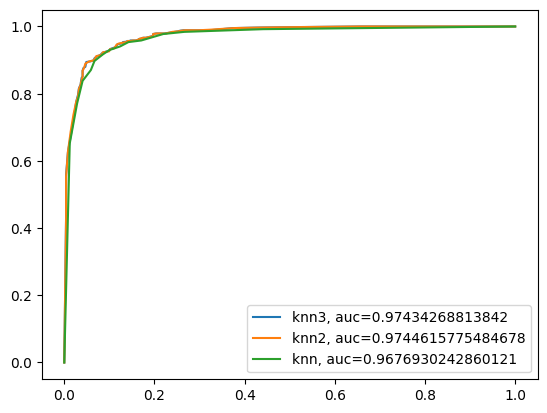

In [ ]:
#curva ROC e valor de AUC para o modelo knn3

y_pred_probability = knn3.predict_proba(x_teste4)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_teste4,  y_pred_probability, pos_label='Osmancik')
auc = metrics.roc_auc_score(y_teste4, y_pred_probability)
plt.plot(fpr,tpr,label="knn3, auc="+str(auc))
plt.legend(loc=4)
#plt.show()

#curva ROC e valor de AUC para o modelo knn2

knn2.fit(x_treino4, y_treino4)
y_pred = knn2.predict(x_teste4)

y_pred_probability = knn2.predict_proba(x_teste4)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_teste4,  y_pred_probability, pos_label='Osmancik')
auc = metrics.roc_auc_score(y_teste4, y_pred_probability)
plt.plot(fpr,tpr,label="knn2, auc="+str(auc))
plt.legend(loc=4)
#plt.show()

#curva ROC e valor de AUC para o modelo knn

knn.fit(x_treino4, y_treino4)
y_pred = knn.predict(x_teste4)

y_pred_probability = knn.predict_proba(x_teste4)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_teste4,  y_pred_probability, pos_label='Osmancik')
auc = metrics.roc_auc_score(y_teste4, y_pred_probability)
plt.plot(fpr,tpr,label="knn, auc="+str(auc))
plt.legend(loc=4)
plt.show()

O dataset “rice_cammeo_and_osmancik” é multivariado e possui 7 atributos preditivos e 1 atributo alvo. Os 7 atributos preditivos são Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Eccentricity, Convex_Area, e Extent. O atributo alvo é Class, que está dividido entre Cammeo e Osmancik. O dataset está dividido em 57,22% para Osmancik e 42,78% para Cammeo, apresentando um leve desbalanceamento. No entanto, foi julgado que não seria necessário equilibrar os dados.

Primeira Etapa:
No pré-processamento inicial, verificamos a presença de valores faltantes e duplicados, mas nenhum problema foi encontrado. Em seguida, analisamos a distribuição dos atributos por meio de boxplots e histogramas para identificar possíveis outliers. No primeiro teste, aplicamos o KNN no dataset bruto utilizando validação cruzada de 10 pastas (10-CrossValidation) e obtivemos que o número ideal de vizinhos próximos era 14, utilizando a distância Manhattan, com uma acurácia de 90%.

Segunda Etapa:
Normalizamos o dataset e revisamos os atributos através de boxplots. Observamos que os atributos Area, Minor_Axis_Length e Eccentricity continham outliers. Criamos um novo dataset removendo outliers dos atributos Minor_Axis_Length e Eccentricity, e constatamos que Area não continha mais outliers. Perdemos um total de 91 amostras, mas a divisão do dataset permaneceu aproximadamente a mesma. Além disso, criamos um gráfico de dispersão relacionando todos os atributos. Em seguida, treinamos o KNN novamente e determinamos que o melhor número de vizinhos próximos era 59, utilizando a distância de Minkowski com p=3, alcançando uma acurácia de 93%.

Terceira Etapa:
Verificamos a importância dos atributos usando feature_importances_ de uma árvore de decisão e identificamos que Major_Axis_Length parecia ser o mais relevante. Usando o gráfico de dispersão criado na segunda etapa, escolhemos o gráfico que parecia mais facilmente separável, que foi "Major_Axis_Length x Eccentricity". Criamos um dataset apenas com esses dois atributos e treinamos o modelo KNN, obtendo um número de vizinhos próximos de 58 e usando a distância de Minkowski com p=3, com uma acurácia de aproximadamente 93%. A área sobre a curva ROC também foi calculada, demonstrando um desempenho superior em relação ao de outros algoritmos (árvore de decisão e random forest). Optamos por esse modelo devido à redução do custo computacional e da dimensão do KNN.

**2ª Questão: (3,0 pontos) Utilizando um banco de dados sugerido por você, aborde o problema de regressão utilizando o algoritmo k-NN. Implemente a regressão em Jupyter Notebook.**

In [ ]:
#dataset escolhido: https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

In [ ]:

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets
data_set_concrete = concrete_compressive_strength.data.original


In [ ]:
data_set_concrete.describe()


Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.400000        968.000000      779.500000    28.000000   
75%           10.200000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

       Concrete compressive strength  
count                    1030.000000  
mean                       35.817961  
std                        16.705742  
min                         2.330000  
25%                        23.710000  
50%                        34.445000  
75%                        46.135000  
max                        82.600000

In [ ]:
data_set_concrete.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [ ]:
data_set_concrete.duplicated().sum()

25

In [ ]:
data_set_concrete.shape

(1030, 9)

In [ ]:
duplicates = data_set_concrete.duplicated(keep=False)
duplicate_indices = data_set_concrete.index[duplicates].tolist()
duplicated_rows = data_set_concrete.loc[duplicate_indices]

duplicated_rows

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
72    425.0               106.3      0.0  153.5              16.5   
77    425.0               106.3      0.0  153.5              16.5   
80    425.0               106.3      0.0  153.5              16.5   
83    362.6               189.0      0.0  164.9              11.6   
86    362.6               189.0      0.0  164.9              11.6   
88    362.6               189.0      0.0  164.9              11.6   
91    362.6               189.0      0.0  164.9              11.6   
95    425.0               106.3      0.0  153.5              16.5   
100   425.0               106.3      0.0  153.5              16.5   
103   425.0               106.3      0.0  153.5              16.5   
106   362.6               189.0      0.0  164.9              11.6   
109   362.6               189.0      0.0  164.9              11.6   
111   362.6               189.0      0.0  164.9              11.6   
118   425.0               106.3      0.0  153.5              16.5   
123   425.0               106.3      0.0  153.5              16.5   
126   425.0               106.3      0.0  153.5              16.5   
129   362.6               189.0      0.0  164.9              11.6   
132   362.6               189.0      0.0  164.9              11.6   
134   362.6               189.0      0.0  164.9              11.6   
137   362.6               189.0      0.0  164.9              11.6   
141   425.0               106.3      0.0  153.5              16.5   
146   425.0               106.3      0.0  153.5              16.5   
149   425.0               106.3      0.0  153.5              16.5   
152   362.6               189.0      0.0  164.9              11.6   
155   362.6               189.0      0.0  164.9              11.6   
157   362.6               189.0      0.0  164.9              11.6   
160   362.6               189.0      0.0  164.9              11.6   
164   425.0               106.3      0.0  153.5              16.5   
169   425.0               106.3      0.0  153.5              16.5   
172   425.0               106.3      0.0  153.5              16.5   
175   362.6               189.0      0.0  164.9              11.6   
177   362.6               189.0      0.0  164.9              11.6   
179   362.6               189.0      0.0  164.9              11.6   
182   362.6               189.0      0.0  164.9              11.6   
801   252.0                 0.0      0.0  185.0               0.0   
809   252.0                 0.0      0.0  185.0               0.0   

     Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
72              852.1           887.1    3                          33.40  
77              852.1           887.1    3                          33.40  
80              852.1           887.1    3                          33.40  
83              944.7           755.8    3                          35.30  
86              944.7           755.8    3                          35.30  
88              944.7           755.8    3                          35.30  
91              944.7           755.8    3                          35.30  
95              852.1           887.1    7                          49.20  
100             852.1           887.1    7                          49.20  
103             852.1           887.1    7                          49.20  
106             944.7           755.8    7                          55.90  
109             944.7           755.8    7                          55.90  
111             944.7           755.8    7                          55.90  
118             852.1           887.1   28                          60.29  
123             852.1           887.1   28                          60.29  
126             852.1           887.1   28                          60.29  
129             944.7           755.8   28                          71.30  
132             944.7           755.8   28                          71.30  
134    

In [ ]:
data_set_concrete = data_set_concrete.drop_duplicates(keep='first').reset_index(drop=True)

In [ ]:
data_set_concrete

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1000   276.4               116.0     90.3  179.6               8.9   
1001   322.2                 0.0    115.6  196.0              10.4   
1002   148.5               139.4    108.6  192.7               6.1   
1003   159.1               186.7      0.0  175.6              11.3   
1004   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
0               1040.0           676.0   28                          79.99  
1               1055.0           676.0   28                          61.89  
2                932.0           594.0  270                          40.27  
3                932.0           594.0  365                          41.05  
4                978.4           825.5  360                          44.30  
...                ...             ...  ...                            ...  
1000             870.1           768.3   28                          44.28  
1001             817.9           813.4   28                          31.18  
1002             892.4           780.0   28                          23.70  
1003             989.6           788.9   28                          32.77  
1004             864.5           761.5   28                          32.40  

[1005 rows x 9 columns]

In [ ]:
data_set_concrete.duplicated().sum()

0

In [ ]:
data_set_concrete.shape

(1005, 9)

In [ ]:
def plotar_boxplotmaishistogram(dados):
  plt.figure(figsize=(8, 10))
  plt.subplot(2, 1, 2)
  sns.boxplot(data = dados , orient="v")
  plt.title(f'Boxplot({dados.name})')
  plt.figure(figsize=(8, 10))
  plt.subplot(2, 1, 2)
  plt.title(f'Histograma({dados.name})')
  sns.histplot(data = dados, kde = True , bins=10);


In [ ]:
data_set_concrete.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

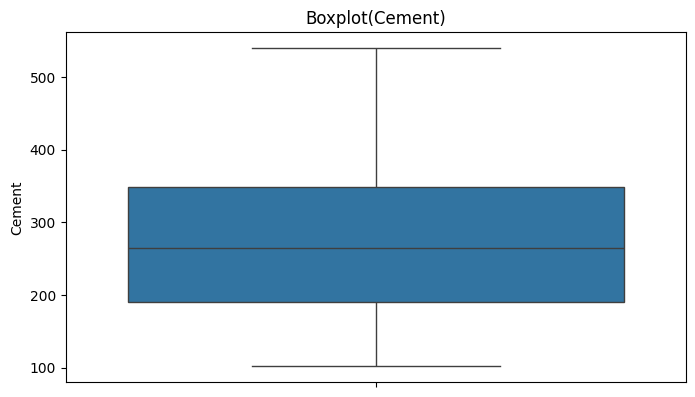

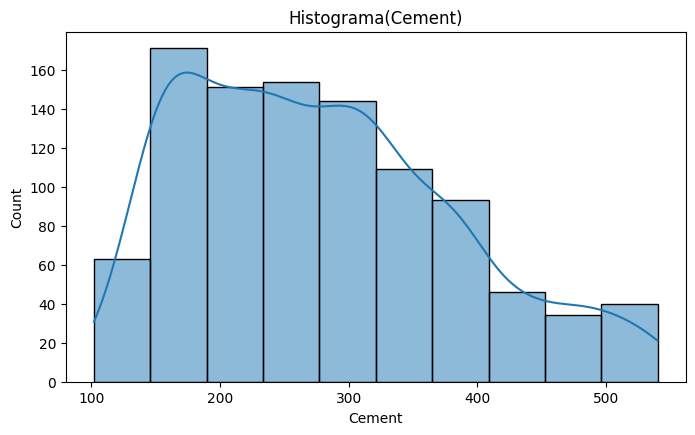

In [ ]:
plotar_boxplotmaishistogram(data_set_concrete.Cement)

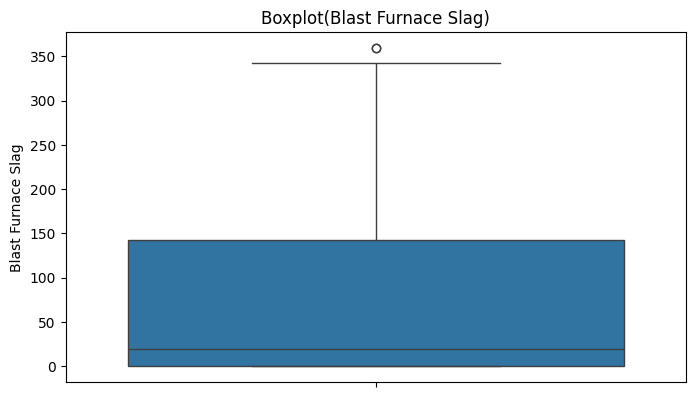

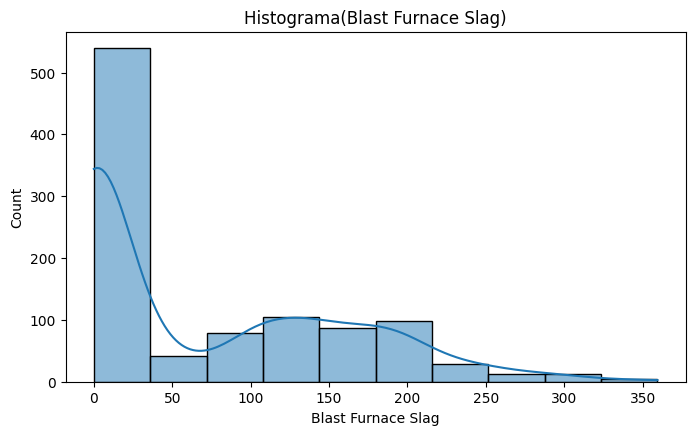

In [ ]:
plotar_boxplotmaishistogram(data_set_concrete['Blast Furnace Slag'])

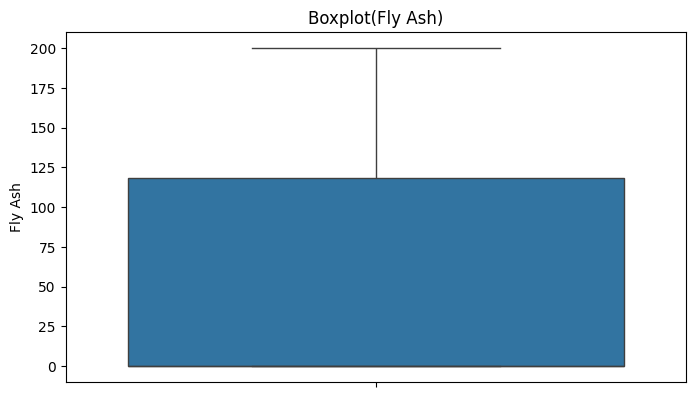

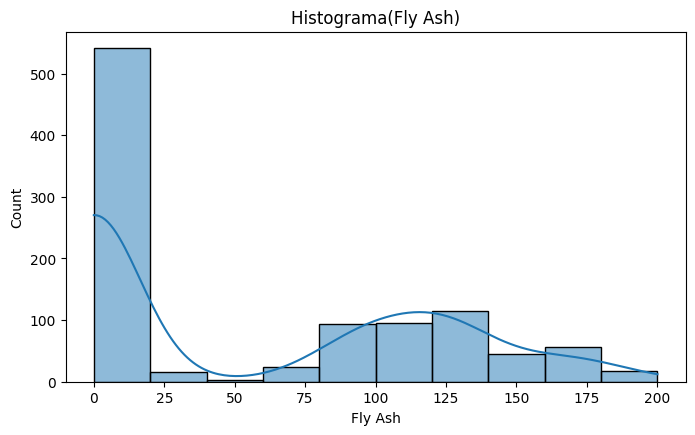

In [ ]:
plotar_boxplotmaishistogram(data_set_concrete['Fly Ash'])

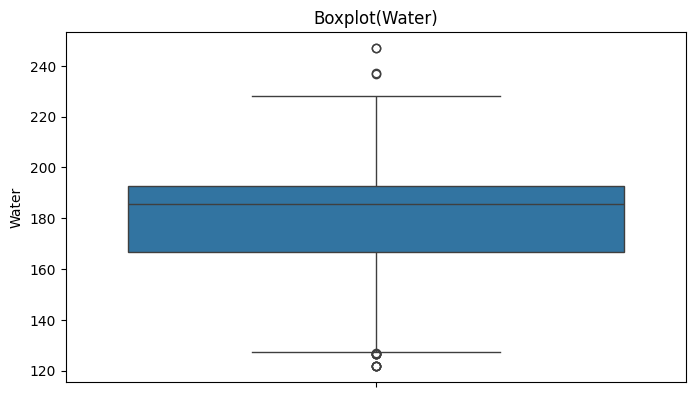

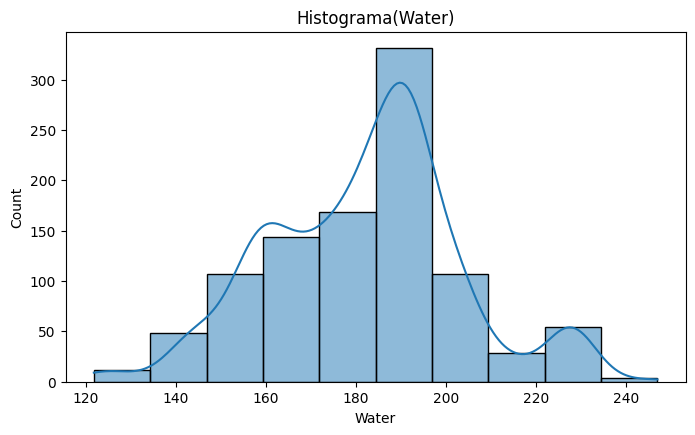

In [ ]:
plotar_boxplotmaishistogram(data_set_concrete['Water'])

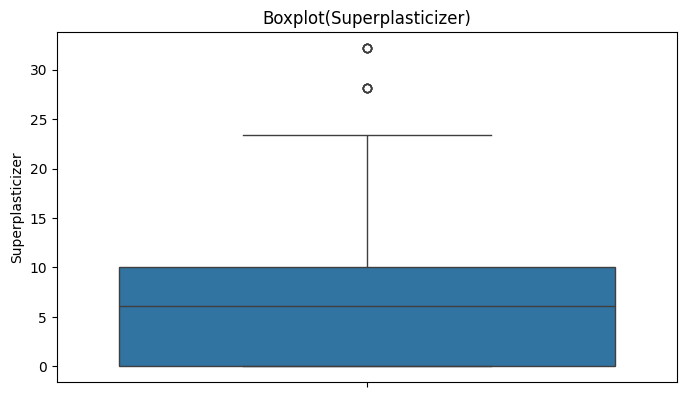

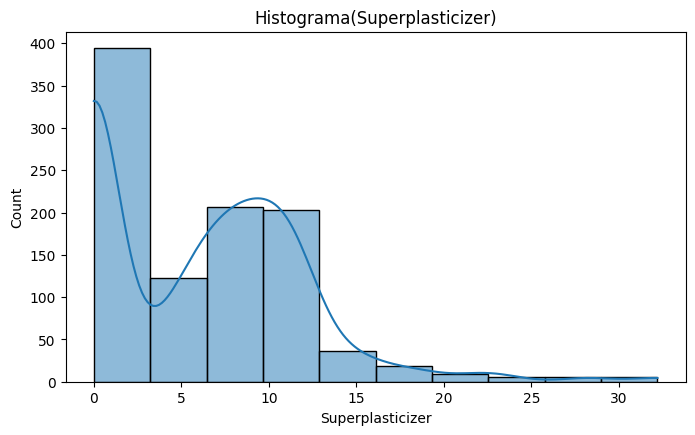

In [ ]:
plotar_boxplotmaishistogram(data_set_concrete['Superplasticizer'])

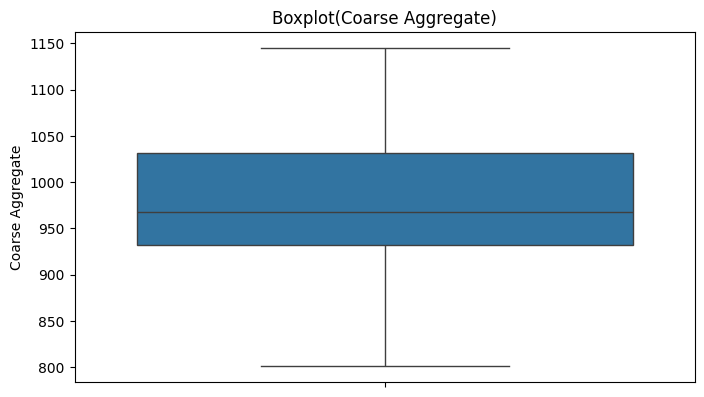

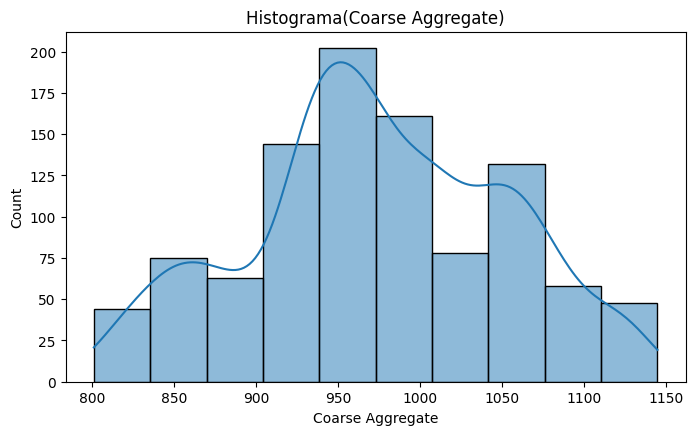

In [ ]:
plotar_boxplotmaishistogram(data_set_concrete['Coarse Aggregate'])

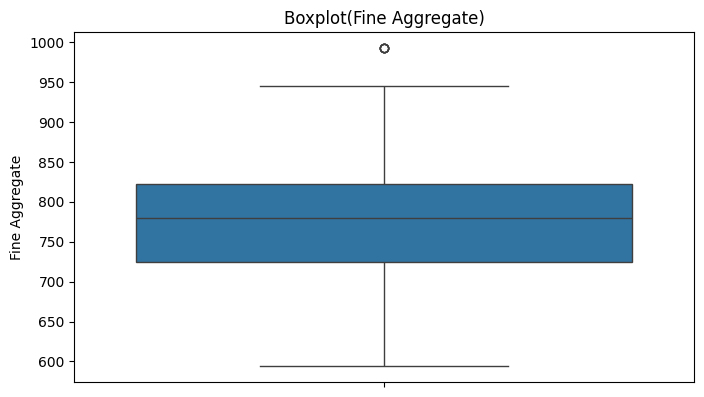

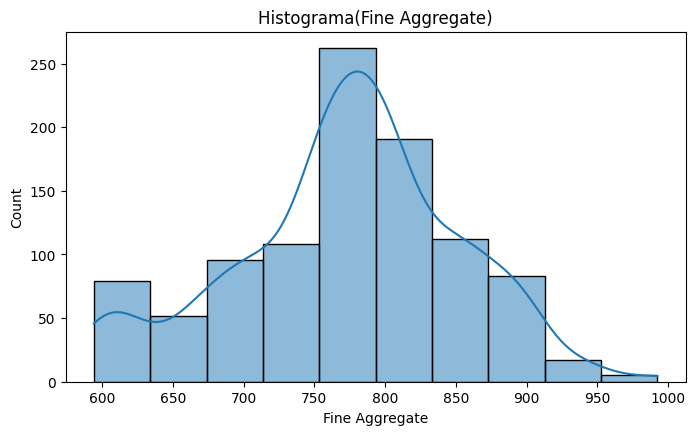

In [ ]:
plotar_boxplotmaishistogram(data_set_concrete['Fine Aggregate'])

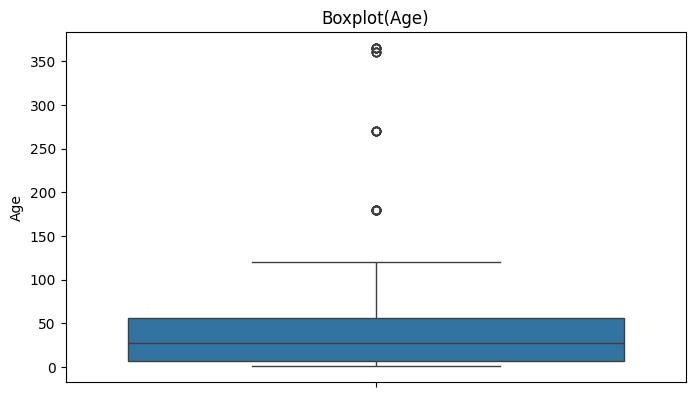

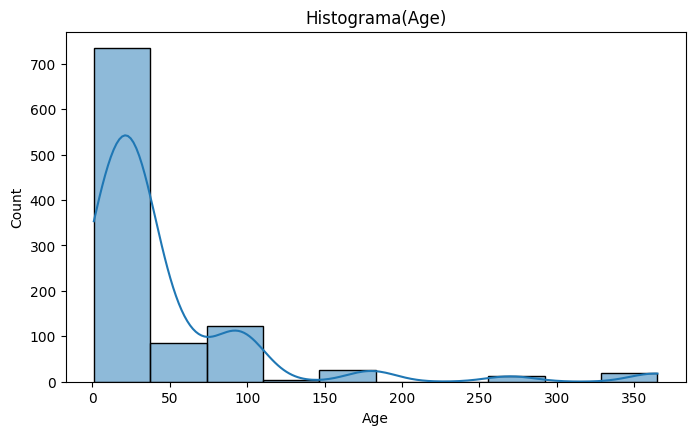

In [ ]:
plotar_boxplotmaishistogram(data_set_concrete['Age'])

<Axes: xlabel='Age', ylabel='Concrete compressive strength'>

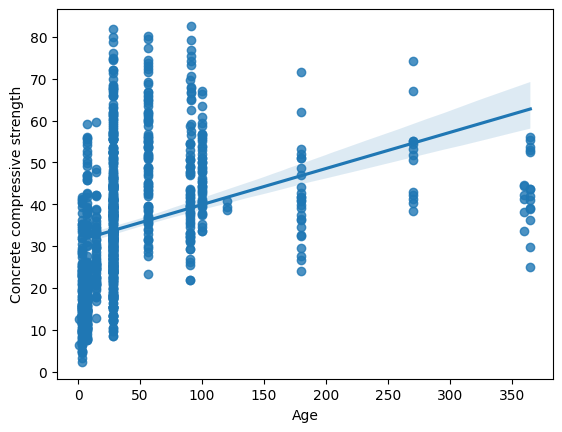

In [ ]:
sns.regplot(x=data_set_concrete['Age'] , y=data_set_concrete['Concrete compressive strength'])

Percebemos que os valores acima de 180 anos são parecidos com os próximos de 100, então atualizei todos os valores de idade acima para 100

In [ ]:
data_set_concrete['Age'].corr(data_set_concrete['Concrete compressive strength'])

0.33736693160447256

In [ ]:
data_set_concrete['Age'].unique()

array([ 28, 270, 365, 360,  90, 180,   3,   7,  56,  91,  14, 100, 120,
         1])

In [ ]:
data_set_concrete_processado = data_set_concrete.copy()

In [ ]:
data_set_concrete_processado['Age'].replace([180, 270, 360, 365], 100 , inplace = True)


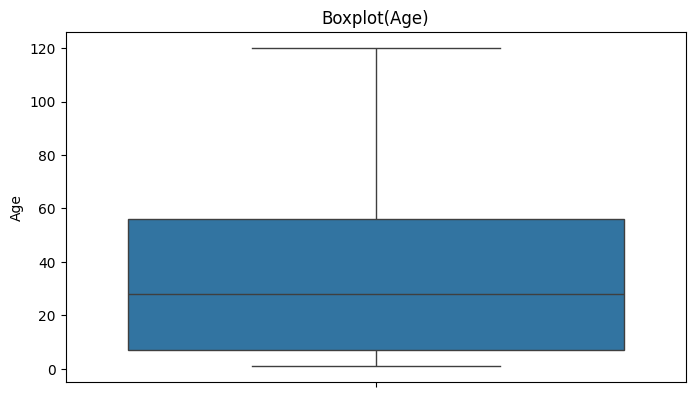

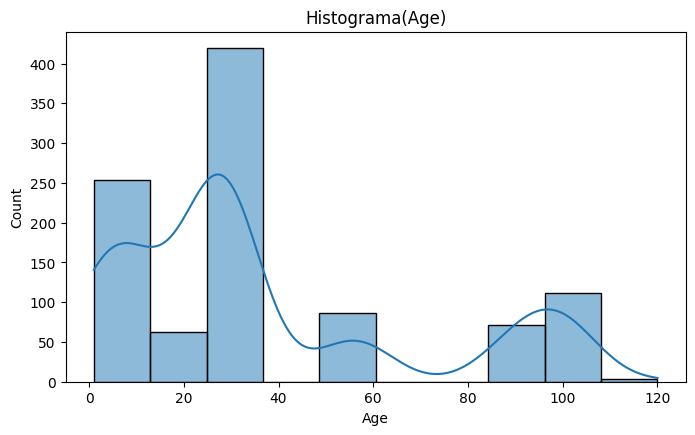

In [ ]:
plotar_boxplotmaishistogram(data_set_concrete_processado['Age'])

Movemos os outliers para uma posição que parecia ser interessante  analisando o regplot

In [ ]:
previsores_concrete = data_set_concrete_processado.iloc[:,0:8]
alvos_concrete = data_set_concrete_processado.iloc[:,8]
previsores_esc_concrete = StandardScaler().fit_transform(previsores_concrete)
previsores_esc_concrete = pd.DataFrame(previsores_esc_concrete, columns=previsores_concrete.columns)

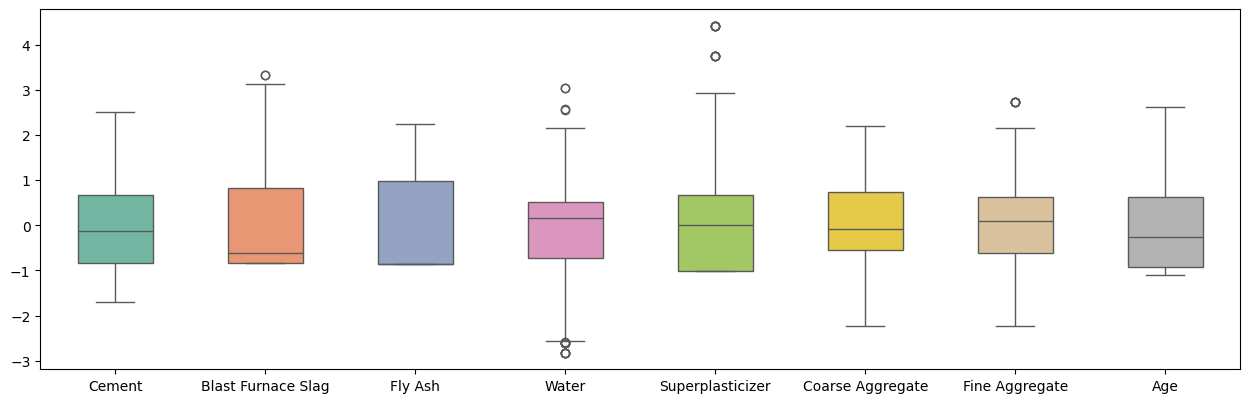

In [ ]:
plot_custom_boxplot(previsores_esc_concrete)

In [ ]:
data_concrete_original_esc = pd.concat([previsores_esc_concrete, alvos_concrete], axis=1)

In [ ]:
data_concrete_original_esc

Cement  Blast Furnace Slag   Fly Ash     Water  Superplasticizer  \
0     2.506116           -0.836471 -0.865375 -0.941235         -0.597131   
1     2.506116           -0.836471 -0.865375 -0.941235         -0.597131   
2     0.516516            0.818045 -0.865375  2.153185         -1.019640   
3     0.516516            0.818045 -0.865375  2.153185         -1.019640   
4    -0.767375            0.700778 -0.865375  0.465320         -1.019640   
...        ...                 ...       ...       ...               ...   
1000 -0.021395            0.510363  0.541693 -0.116056          0.484495   
1001  0.417755           -0.836471  0.935921  0.652861          0.738001   
1002 -1.247756            0.782052  0.826846  0.498140          0.011284   
1003 -1.146118            1.331235 -0.865375 -0.303597          0.890104   
1004 -0.170016            0.330398  0.354707  0.868532          0.433794   

      Coarse Aggregate  Fine Aggregate       Age  \
0             0.846302       -1.204081 -0.261749   
1             1.039748       -1.204081 -0.261749   
2            -0.546508       -2.225246  1.996793   
3            -0.546508       -2.225246  1.996793   
4             0.051885        0.657677  1.996793   
...                ...             ...       ...   
1000         -1.344795       -0.054648 -0.261749   
1001         -2.017987        0.506993 -0.261749   
1002         -1.057205        0.091055 -0.261749   
1003          0.196324        0.201889 -0.261749   
1004         -1.417015       -0.139330 -0.261749   

      Concrete compressive strength  
0                             79.99  
1                             61.89  
2                             40.27  
3                             41.05  
4                             44.30  
...                             ...  
1000                          44.28  
1001                          31.18  
1002                          23.70  
1003                          32.77  
1004                          32.40  

[1005 rows x 9 columns]

In [ ]:
data_concrete_original_outliers = remocao_outliers(data_concrete_original_esc, 'Superplasticizer' )
data_concrete_original_outliers = remocao_outliers(data_concrete_original_outliers, 'Water' )


In [ ]:
data_concrete_original_outliers.shape

(979, 9)

In [ ]:
previsores_concrete_original = data_concrete_original_outliers.iloc[:,0:8]
alvos_concrete_original = data_concrete_original_outliers.iloc[:,8]

In [ ]:
x_treino,x_teste,y_treino, y_teste = train_test_split(previsores_concrete_original,alvos_concrete_original,test_size = 0.3 , random_state =0)

In [ ]:
# Standardize the features
scaler = StandardScaler()
x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.transform(x_teste)

In [ ]:
# Create and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_treino, y_treino)

KNeighborsRegressor()

In [ ]:
# Make predictions on the test data
y_pred = knn_regressor.predict(x_teste)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_teste, y_pred)
r2 = r2_score(y_teste, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 66.60789749659867
R-squared: 0.7278918019611686


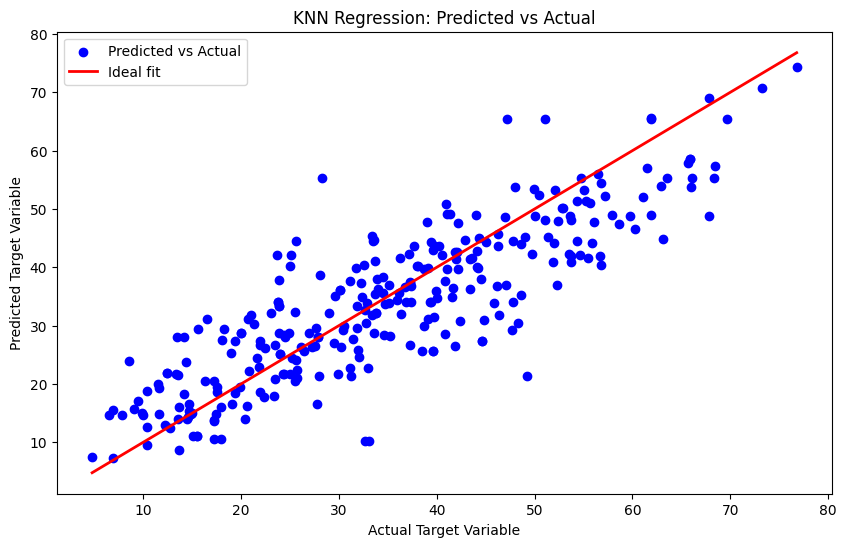

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_teste, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], color='red', linewidth=2, label='Ideal fit')
plt.title('KNN Regression: Predicted vs Actual')
plt.xlabel('Actual Target Variable')
plt.ylabel('Predicted Target Variable')
plt.legend()
plt.show()

In [ ]:
# Create and train the KNN regressor 2
knn_regressor2 = KNeighborsRegressor(n_neighbors=25)
knn_regressor2.fit(x_treino, y_treino)

KNeighborsRegressor(n_neighbors=25)

In [ ]:
# Make predictions on the test data
y_pred = knn_regressor2.predict(x_teste)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_teste, y_pred)
r2 = r2_score(y_teste, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 82.25626356843537
R-squared: 0.6639647174247303


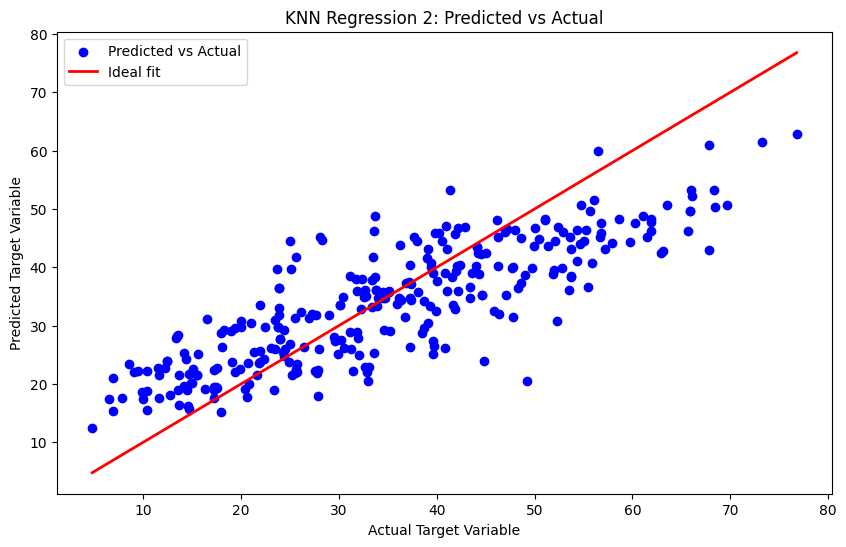

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_teste, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], color='red', linewidth=2, label='Ideal fit')
plt.title('KNN Regression 2: Predicted vs Actual')
plt.xlabel('Actual Target Variable')
plt.ylabel('Predicted Target Variable')
plt.legend()
plt.show()

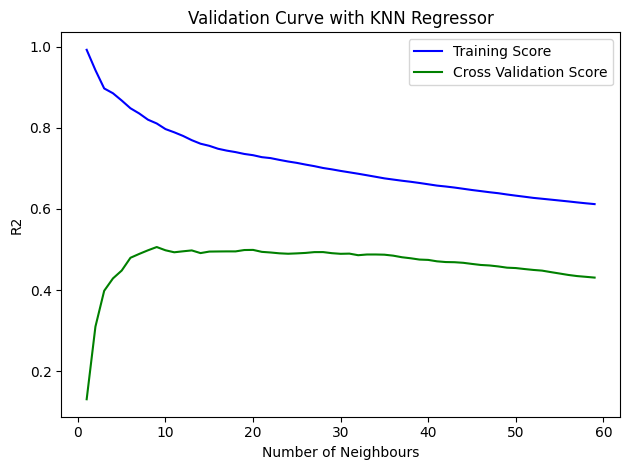

In [ ]:
from sklearn.model_selection import validation_curve

# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 60, 1)

# Calculate r2 on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(KNeighborsRegressor(), previsores_concrete_original, alvos_concrete_original,
                                           param_name="n_neighbors",
                                           param_range=parameter_range,
                                           cv=5, scoring="r2")

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)

# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)

# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
         label="Training Score", color='b')
plt.plot(parameter_range, mean_test_score,
         label="Cross Validation Score", color='g')

# Creating the plot
plt.title("Validation Curve with KNN Regressor")
plt.xlabel("Number of Neighbours")
plt.ylabel("R2")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

Conclusão:<br> Para esse dataset, utilizou-se um análise exploratória dos dados através de histogramas, boxplots e tabelas. Após esse conhecimento geral sobre o dataset, alguns objetos foram removidos a fim de aumentar a eficiência do modelo, como, por exemplo, objetos duplicados e outliers. Após isso, o modelo de regressão foi instanciado e a amostragem por validação cruzada foi feita. Primeiramente, os valores de k=5 e k=25 foram testados. Concluiu-se, por meio das métricas de desempenho (mse e r2), que o modelo com k=5 teve desempenho superior. Por fim, um gráfico de validação do coeficiente R2 foi traçado para identificar a partir de qual valor de k o modelo se torna menos eficiente - valor próximo e abaixo de 10 .